# 🔬 Project Overview: Comparative Topic Analysis of Longevity Communities

This notebook performs an unsupervised topic modeling analysis to map the conversational landscape across three prominent subreddits: **r/PeterAttia**, **r/Longevity**, and **r/Biohackers**. The goal is to quantify and visualize the similarities, differences, and unique areas of focus for each community.

## 🎯 Objectives

1.  **Discover Topics:** Use **BERTopic** to identify and label the major topics of discussion across the combined text data.
2.  **Refine and Stabilize:** Employ advanced techniques (Outlier Reduction, Soft Reassignment) to create a robust, final set of clean topics.
3.  **Visualize Structure:** Map the topics in a 2D space (**UMAP**) and identify their internal hierarchy (**Dendrogram**).
4.  **Compare Communities:** Quantify and visualize the **percentage contribution** of each subreddit to every topic, establishing community dominance.

## 🛠️ Pipeline Steps

| Step | Focus Area | Key Output |
| :--- | :--- | :--- |
| **1** | **Data Prep & Initial Fit** | Cleaned Data, Embeddings, Raw Topics (`topic_raw`) |
| **2** | **Topic Refinement** | Final, Stable Topics (`topic_global`), Reduced Outliers |
| **3** | **Core Analysis** | Topic Size Bar Chart, Temporal Trends (Time Series) |
| **4** | **UMAP Visualization** | 2D Scatter Plot of Topic Clusters (Top N Highlighted) |
| **5** | **Subreddit Contribution** | Normalized Stacked Bar Chart (Ordered by Peter Attia %)|
| **6** | **UMAP Comparison** | 2x2 Grid showing individual subreddit topic distributions |
| **7** | **Hierarchical View** | Dendrogram visualizing inter-topic relationships |
| **8** | **Content Extraction** | Top representative documents for key topics (Future Work) |

---

## 🔑 Expected Key Findings

* Identification of **unique specialization** (e.g., Peter Attia's focus on fitness vs. Longevity's focus on experimental compounds).
* Discovery of **universal, shared interests** (e.g., cholesterol management).
* Visual proof of **topic clustering** and their high-level relationships.

# 📊 Exploratory Data Analysis (EDA) Summary: BLP Combined Data

This section performs a comprehensive exploratory analysis on the combined dataset (`Biohackers`, `Longevity`, `PeterAttia`) to understand volume, engagement, and temporal trends before any machine learning is applied.

---

### 1. 📋 Data Overview & Central Tendency

* **Goal:** Establish baseline metrics for data volume and typical engagement levels.
* **Key Metrics Calculated:**
    * Total rows, full date range, unique authors (if available), and **posts per subreddit**.
    * **Median and Mean** for key engagement features: `score`, `num_comments`, `text_len`, and `title_len`.
* **Key Insight:** The median score and comment count are typically very low (often near zero), indicating that high-engagement posts are rare and skew the mean, making the **median a more robust measure** of typical post engagement.

---

### 2. 📈 Temporal Trends (Time Series Analysis)

* **Goal:** Identify growth, seasonality, and major shifts in activity over the entire date range.
* **Visualizations:**
    * **Line Plots:** Monthly total post volume, average score, total comment volume, and average comments per post.
    * **Multi-Line Plot:** Monthly post volume **separated by subreddit**, showing individual growth trajectories.
    * **Stacked Area Plot:** Monthly **share of posts by subreddit**, illustrating changes in the dominance or size ratio of the communities over time.
* **Key Insight:** This analysis reveals whether the communities are growing, shrinking, or if one subreddit has rapidly eclipsed the others in terms of discussion volume.

---

### 3. 🎯 Distributions and Engagement

* **Goal:** Understand the inherent variance and identify the characteristics of content within the dataset.
* **Visualizations:**
    * **Histograms (Log-Y Scale):** Distributions of `score`, `num_comments`, and `text_len`. The log-y scale handles the heavy skew caused by viral posts.
    * **Faceted Histograms:** Show `score` and `num_comments` distributions **broken down by subreddit**, allowing a direct visual comparison of engagement patterns.
* **Key Insight:** Compares whether one subreddit consistently produces higher-scoring or higher-comment-count content than the others.

---

### 4. 🔗 Correlation Diagnostics

* **Goal:** Quantify the linear relationships between various numeric features.
* **Visualizations:**
    * **Heatmap:** Visualizes the **correlation matrix** for `score`, `num_comments`, `text_len`, and `title_len`.
    * **Scatter Plots:** Samples of `text_len` vs. `score` and `text_len` vs. `num_comments` (low opacity) to visualize if **longer posts are generally more engaging**.
* **Key Insight:** Typically, a weak positive correlation is expected between text length and engagement metrics, but this verifies the strength of that relationship in this specific dataset.

---

### 5. 🔥 Activity Heatmaps

* **Goal:** Provide a granular view of activity over the years.
* **Visualizations:**
    * **Year/Month Heatmap (Overall):** Shows the total post count across all months and years, instantly highlighting **periods of peak activity**.
    * **Per-Subreddit Tables:** Printouts of the last few months of activity for each individual subreddit, confirming recent trends.
* **Key Insight:** Pinpoints exactly when the communities were most active, which can correlate with real-world events or the subreddit's founding/growth periods.


## 🔢 Data Volume and Composition

* **Total Documents:** The dataset contains **48,935** posts across all three subreddits.
* **Dataset Size:** The data is substantial, occupying **108.17 MB** of memory.
* **Subreddit Dominance:**
    * **r/Biohackers** is the largest contributor, accounting for over half the documents ($\approx 61\%$).
    * **r/Longevity** and **r/PeterAttia** contribute the remaining volume, with r/Longevity having nearly twice the posts of r/PeterAttia.

| Subreddit | Count | Share (%) |
| :--- | :--- | :--- |
| **Biohackers** | 29,773 | 60.8% |
| **Longevity** | 12,343 | 25.2% |
| **PeterAttia** | 6,819 | 13.9% |

---

## 🧹 Data Quality and Types

* **High Data Quality:** Crucially, the key analytical columns (`subreddit`, `created_dt`, `score`, `num_comments`, `doc`, `text_len`) show **zero null values**. This confirms the data cleaning and preprocessing steps were highly effective, providing a robust foundation for modeling.
* **Key Data Types:**
    * **Text:** `doc`, `title`, and `text` are correctly stored as `object` (string) types for text analysis.
    * **Metrics:** `score`, `num_comments`, and `text_len` are correctly parsed as **`int64`**, suitable for direct numerical analysis and visualization.
    * **Time:** The creation timestamp (`created_dt`) is in the efficient **`datetime64[ns]`** format, ready for time series analysis.

[Using] /Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/Introduction-to-Machine-Learning/unsupervised/CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project/data/combined_dedup/BLP_combined_2020-01-01_2025-11-02_dedup_thru_2024.csv
=== DATA SUMMARY (BLP) ===
Rows: 48,935
Date range: 2020-01-01 00:05:35 → 2024-12-31 23:30:03
Unique authors: 19,420

Posts per subreddit:
subreddit
Biohackers    29773
Longevity     12343
Peterattia     6819
Name: count, dtype: int64

Central tendency:
Score  — median: 1.0 | mean: 16.66
Comments — median: 1.0 | mean: 6.99
Text length — median: 187 | Title length — median: 54

Posts per year:
year
2020     5163
2021     6164
2022     6257
2023    10483
2024    20868
Name: count, dtype: int64

=== TOP 10 AUTHORS (all subs combined) ===
author
chromosomalcrossover    1124
Sorin61                  948
StoicOptom               614
philnewman100            547
shadesofaltruism         538
[deleted]           

/var/folders/mn/5t8x6ck57719dt2pg7h0_xl40000gn/T/ipykernel_45077/944953765.py:114: FutureWarning: DataFrameGroupBy.resample operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_by_sub = g.groupby("subreddit").resample("MS").size().unstack(0).fillna(0)


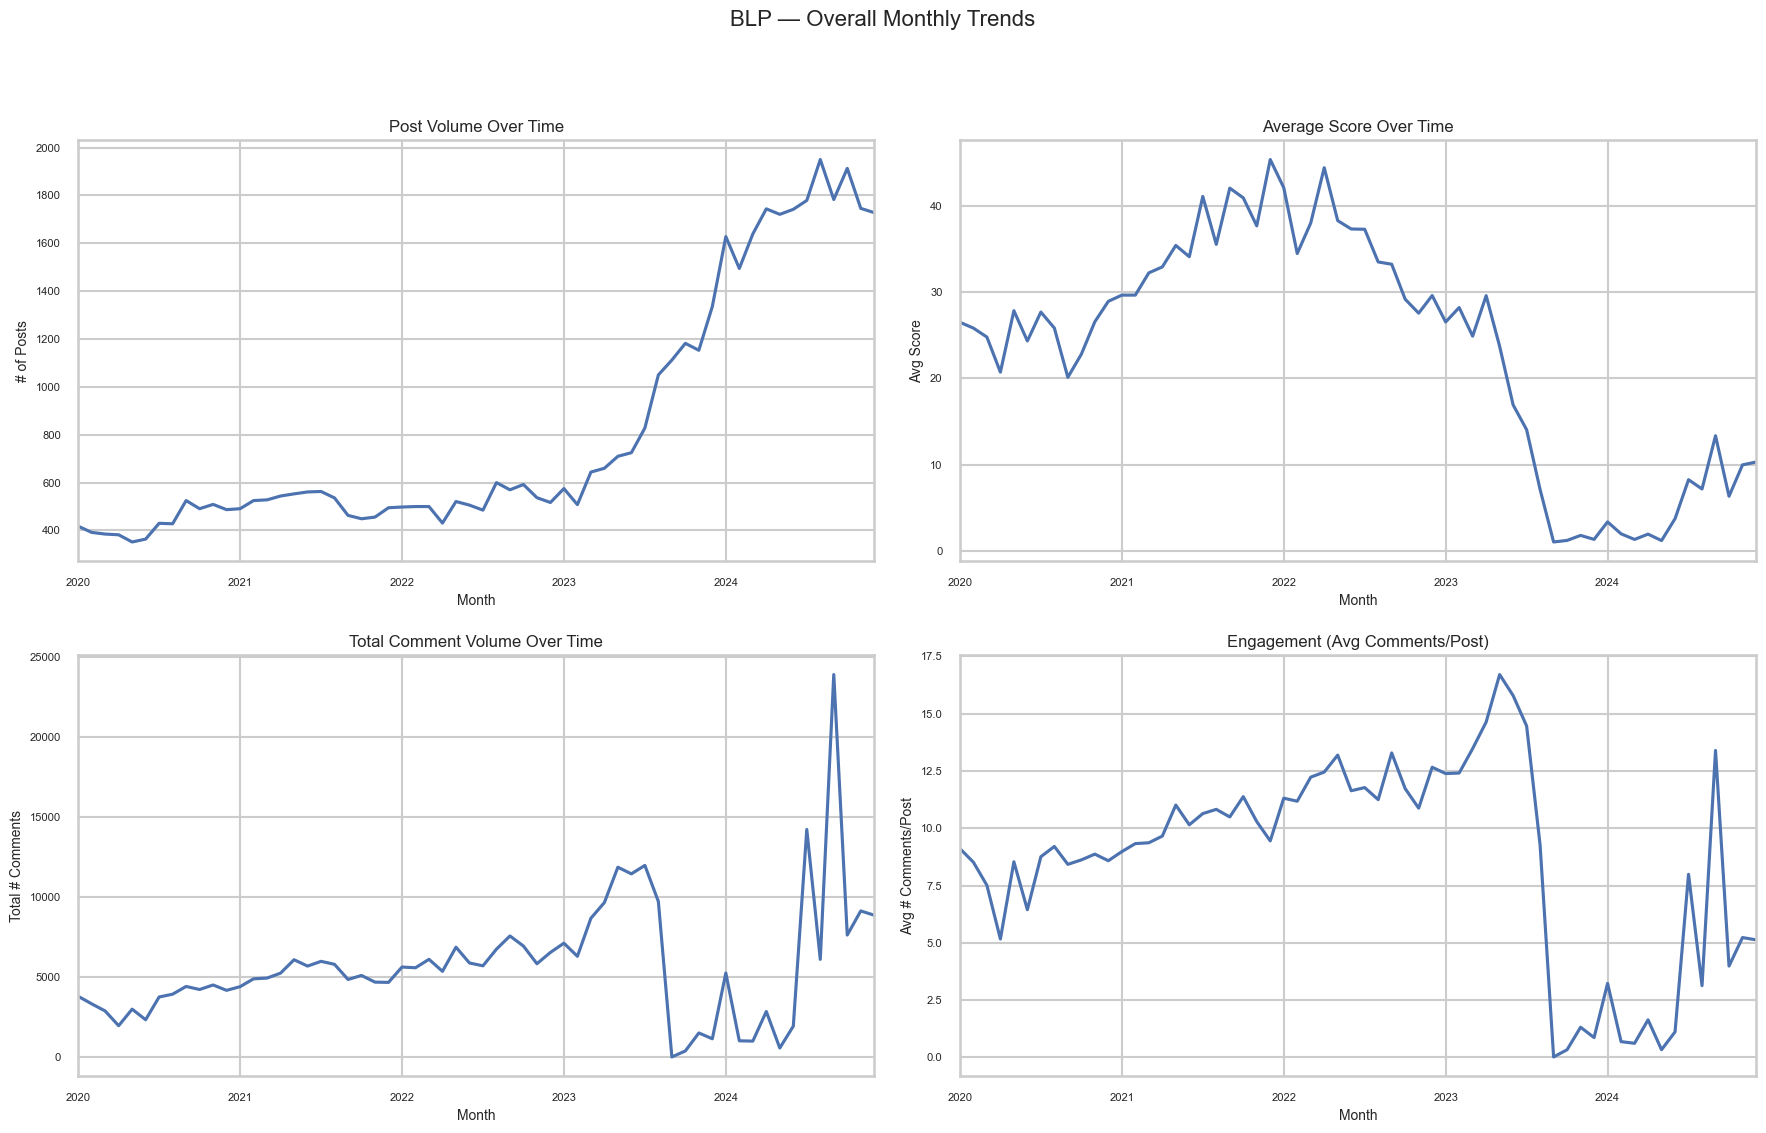


=== Monthly Trends (Per Subreddit) ===


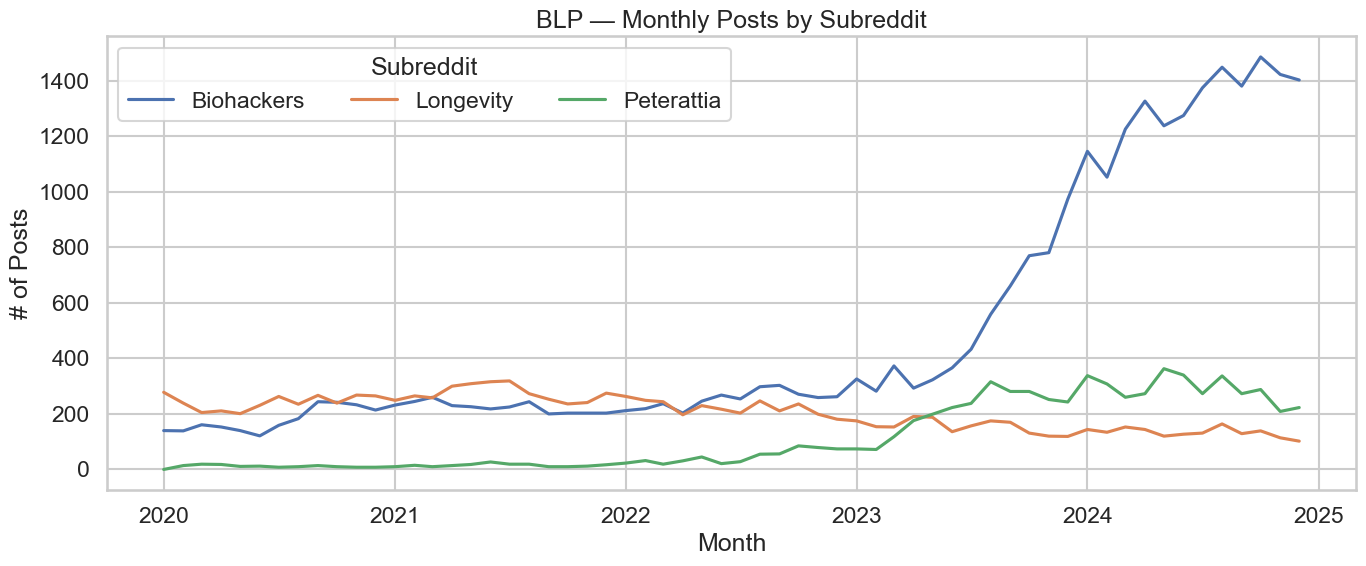

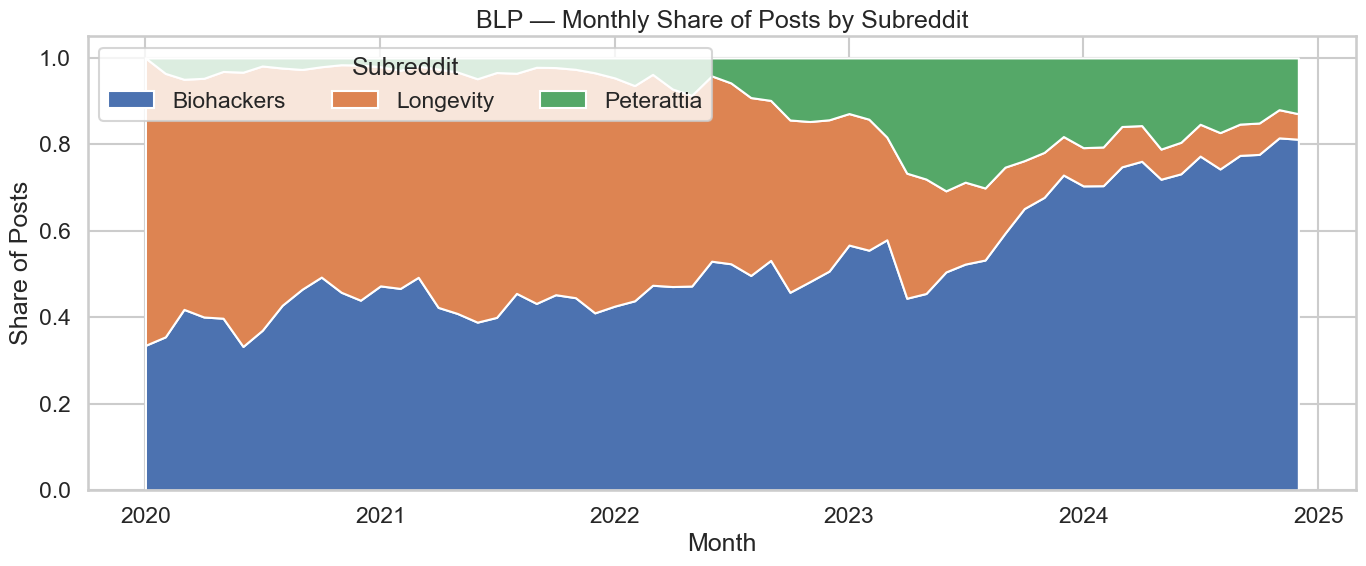


=== Distributions (Overall BLP) ===


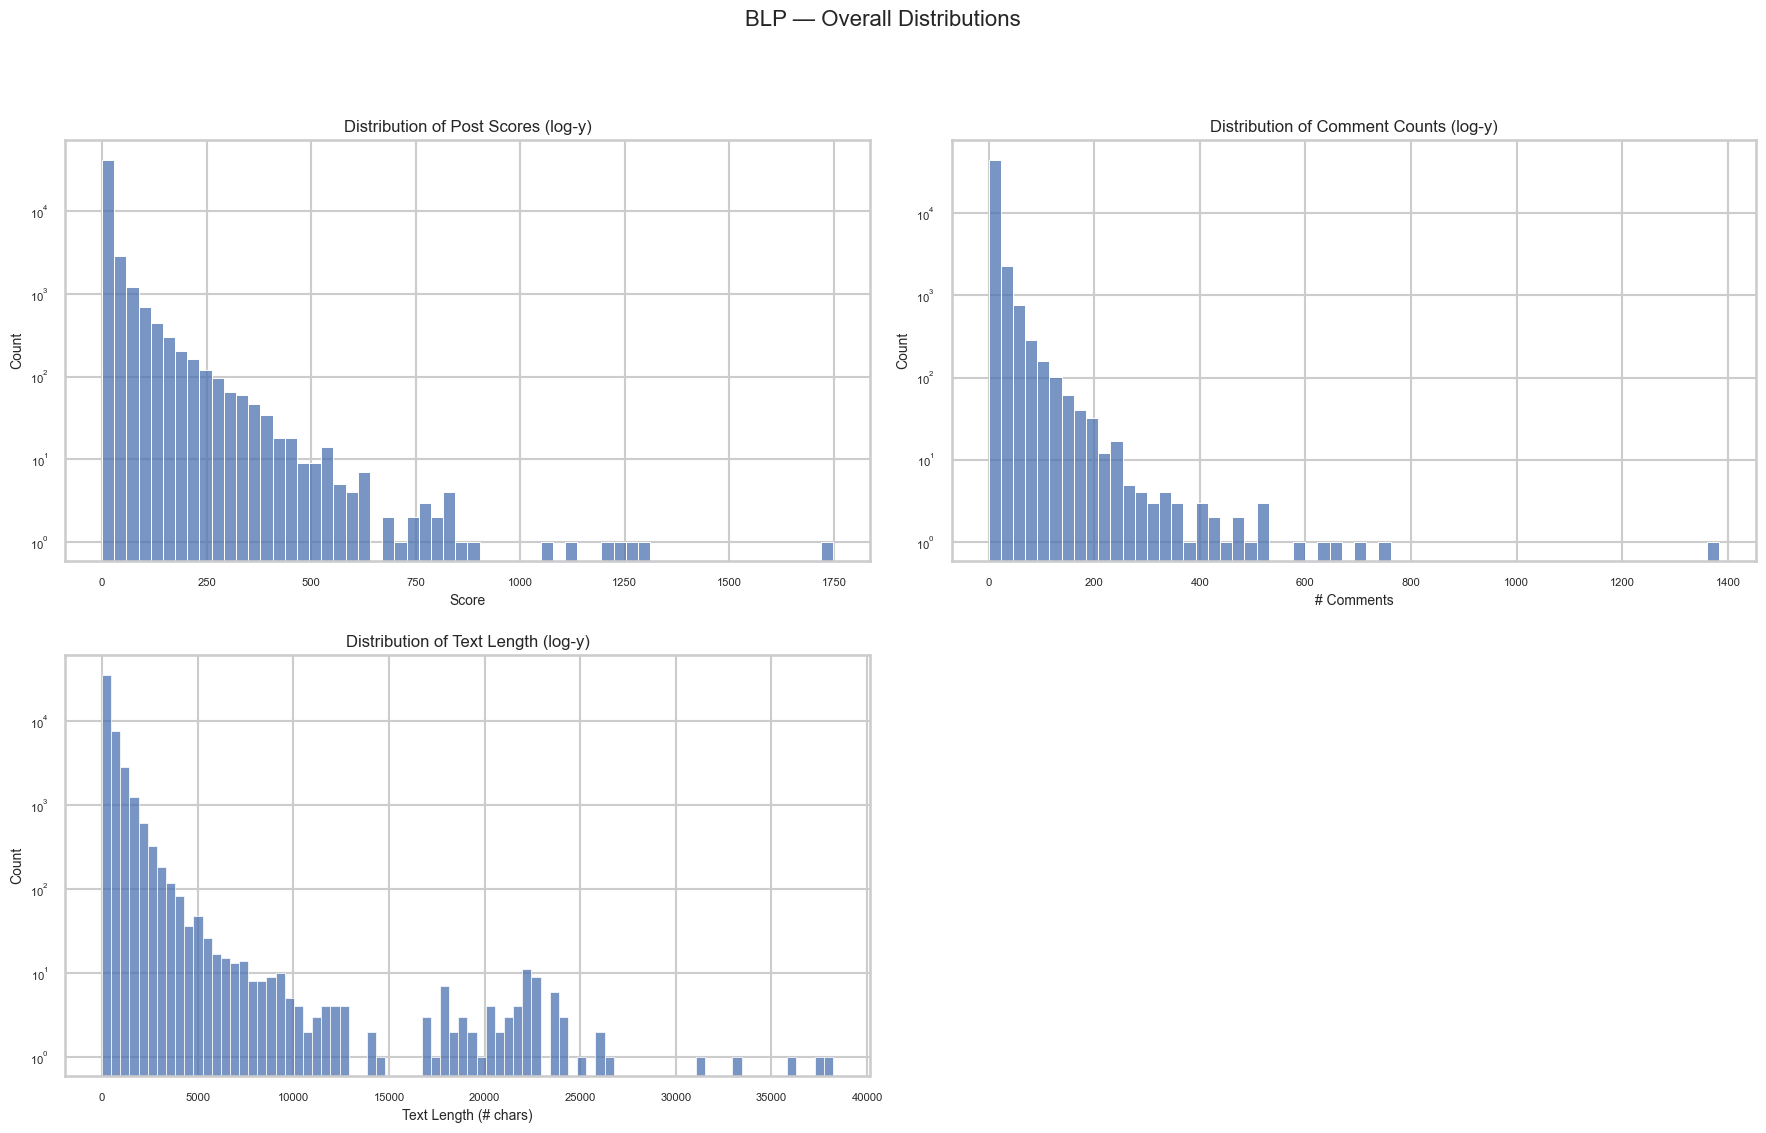


=== Distributions (Per Subreddit) ===


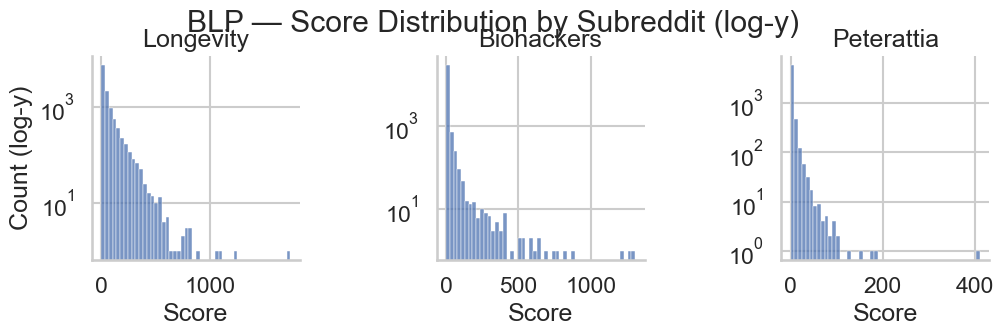

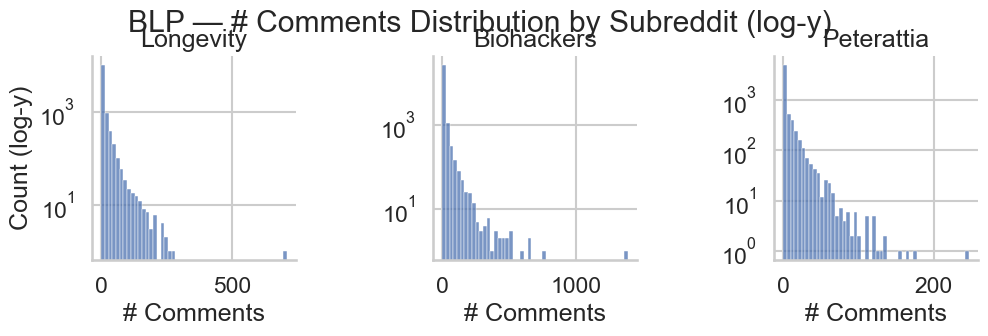


=== Correlations & Scatter Diagnostics ===


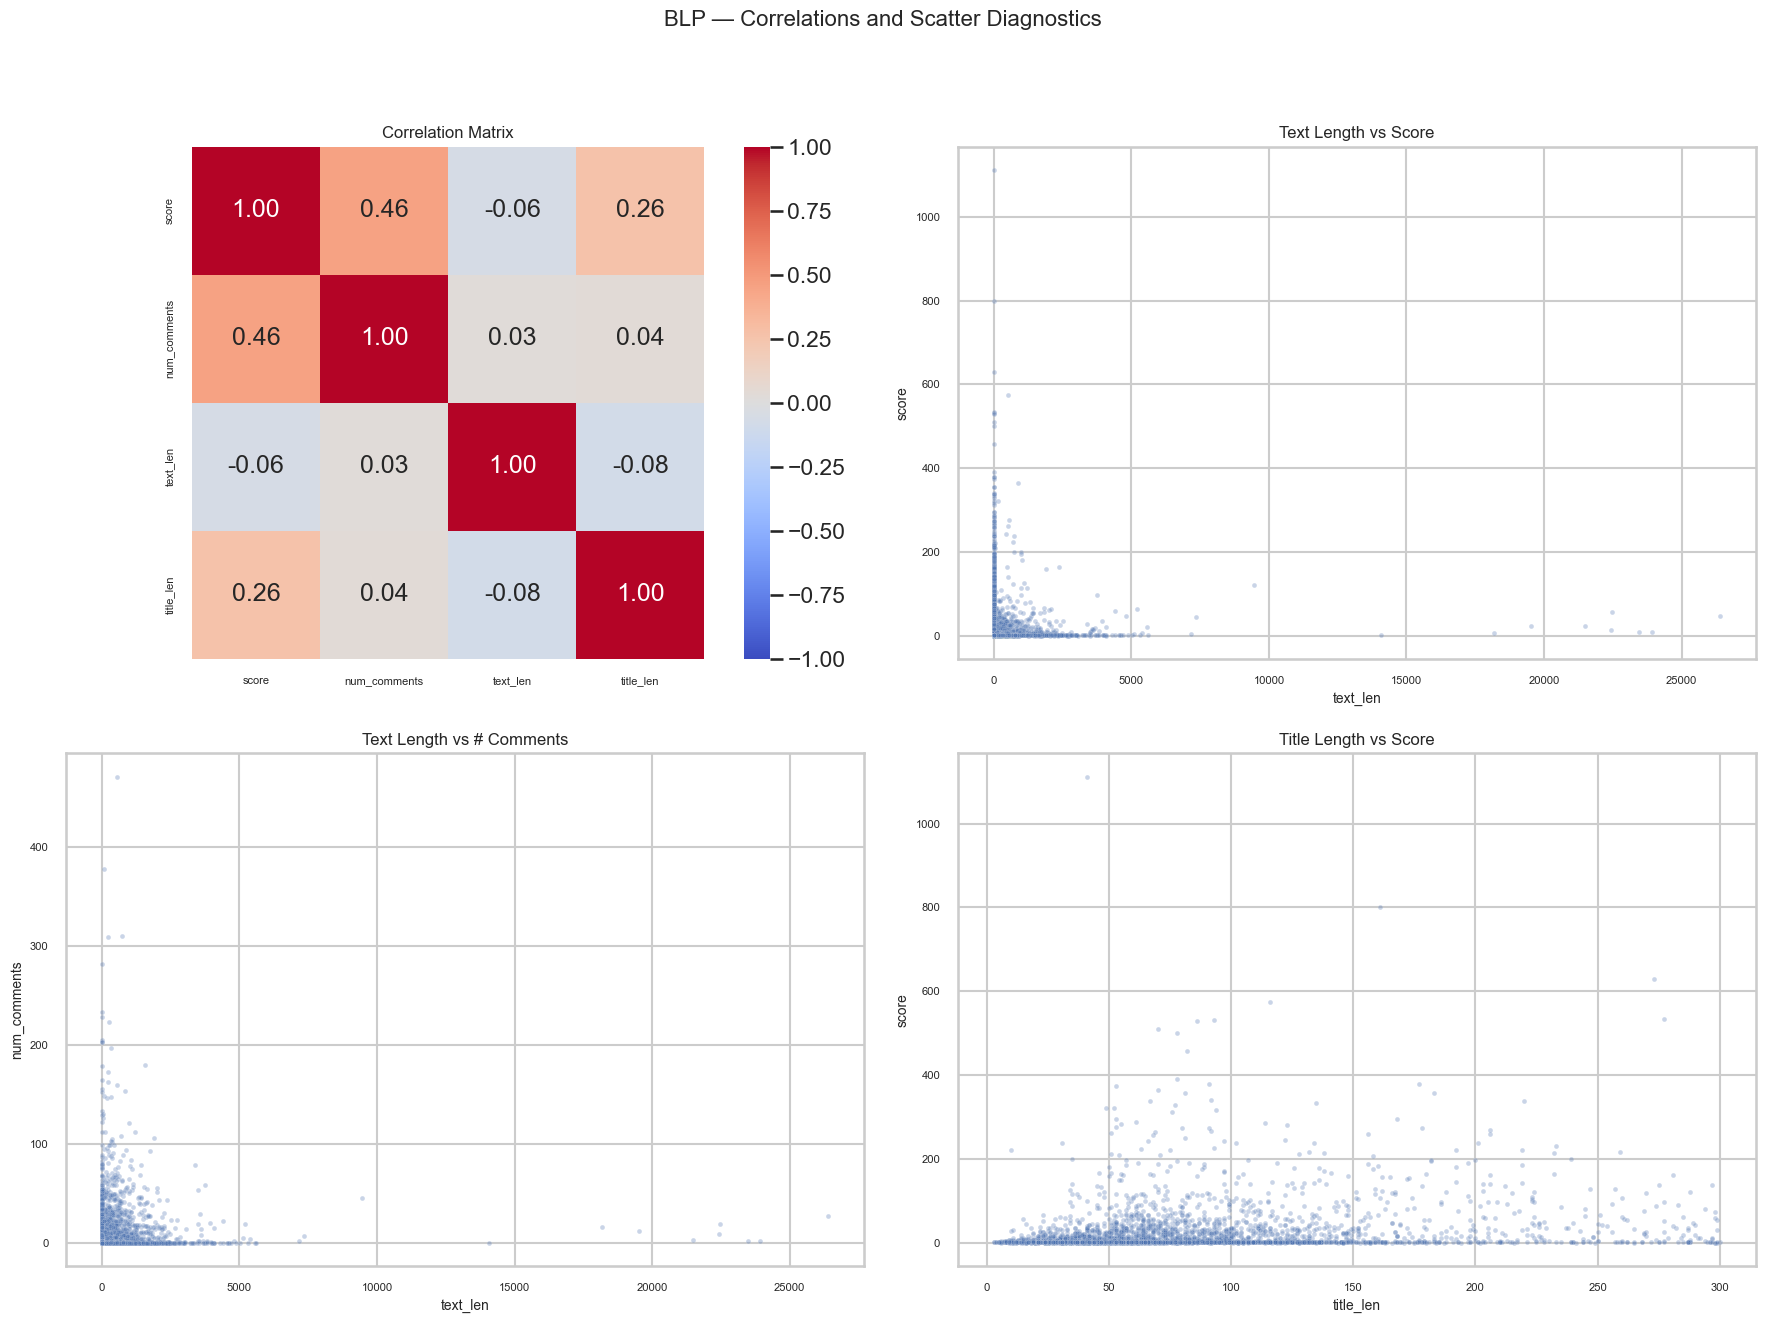


=== CORRELATION MATRIX (BLP) ===
              score  num_comments  text_len  title_len
score         1.000         0.456    -0.056      0.259
num_comments  0.456         1.000     0.029      0.035
text_len     -0.056         0.029     1.000     -0.083
title_len     0.259         0.035    -0.083      1.000

=== Activity Heatmap ===


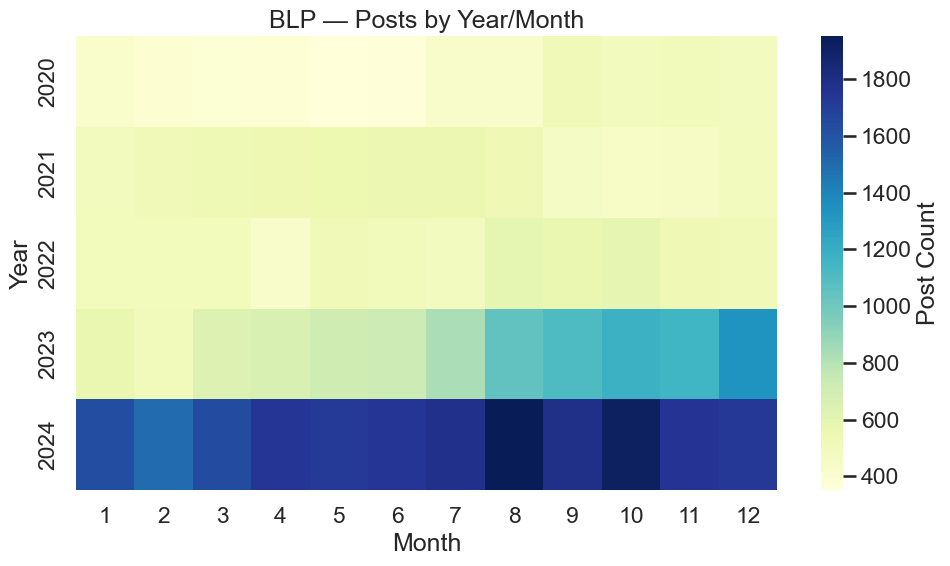


Per-subreddit Year/Month last 6 rows each:

[Biohackers]
month    1     2     3     4     5     6     7     8     9     10    11    12
year                                                                         
2020    140   139   161   153   140   121   159   183   244   242   233   214
2021    232   245   260   230   226   218   225   244   200   203   203   203
2022    212   219   237   203   246   268   254   298   303   271   259   262
2023    326   282   373   293   323   366   433   559   661   770   781   974
2024   1146  1053  1226  1327  1238  1275  1375  1449  1381  1486  1423  1403

[Longevity]
month   1    2    3    4    5    6    7    8    9    10   11   12
year                                                             
2020   278  239  205  211  201  231  263  235  267  239  268  265
2021   249  265  258  300  309  316  319  273  253  236  241  275
2022   263  249  244  197  230  217  203  247  211  236  199  181
2023   175  154  153  191  188  136  157  175  170  1

In [1]:
# ============================================
# 🔍 EDA: BLP (Biohackers + Longevity + PeterAttia) - FIXED FILE PATH & PLOT LAYOUT
# ============================================

import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Locate BLP file (EDITED SECTION)
# -----------------------------
BASE_DIR = Path("/Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/Introduction-to-Machine-Learning/unsupervised/CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project/data/combined_dedup")

# Explicitly set the correct file path as requested
CSV_FILENAME = "BLP_combined_2020-01-01_2025-11-02_dedup_thru_2024.csv"
CSV_PATH = BASE_DIR / CSV_FILENAME
print(f"[Using] {CSV_PATH}")

if not CSV_PATH.exists():
    raise FileNotFoundError(f"The specified file was not found: {CSV_PATH}")


# -----------------------------
# Load + basic clean
# -----------------------------
df = pd.read_csv(CSV_PATH, low_memory=False)
df.columns = [c.lower() for c in df.columns]

# created_dt
if "created_dt" in df.columns:
    df["created_dt"] = pd.to_datetime(df["created_dt"], errors="coerce")
elif "created_utc" in df.columns:
    df["created_dt"] = pd.to_datetime(pd.to_numeric(df["created_utc"], errors="coerce"), unit="s", errors="coerce")
else:
    df["created_dt"] = pd.NaT

df = df.dropna(subset=["created_dt"]).copy()

# subreddit (normalize)
if "subreddit" not in df.columns:
    df["subreddit"] = "unknown"
df["subreddit"] = df["subreddit"].astype(str).str.strip().str.title()  # e.g., Biohackers → "Biohackers"

# text fields + doc
for col in ["title", "text"]:
    if col not in df.columns:
        df[col] = ""
df["title"] = df["title"].fillna("").astype(str).str.strip()
df["text"]  = df["text"].fillna("").astype(str).str.strip()
if "doc" not in df.columns:
    df["doc"] = (df["title"] + ". " + df["text"]).str.strip()

# lengths
df["text_len"]  = df["text"].str.len()
df["title_len"] = df["title"].str.len()

# numeric metrics (avoid blank plots)
def to_num(series):
    s = pd.to_numeric(series, errors="coerce")
    return s.replace([np.inf, -np.inf], np.nan)

for col in ["score", "num_comments", "text_len", "title_len"]:
    if col not in df.columns:
        df[col] = np.nan
    df[col] = to_num(df[col])

# calendar helpers
df["year"]  = df["created_dt"].dt.year
df["month"] = df["created_dt"].dt.to_period("M")

# -----------------------------
# Summaries
# -----------------------------
print("=== DATA SUMMARY (BLP) ===")
print(f"Rows: {len(df):,}")
print(f"Date range: {df['created_dt'].min()} → {df['created_dt'].max()}")
if "author" in df.columns:
    print(f"Unique authors: {df['author'].nunique(dropna=True):,}")
print("\nPosts per subreddit:")
print(df["subreddit"].value_counts())

print("\nCentral tendency:")
print(f"Score  — median: {df['score'].median()} | mean: {df['score'].mean():.2f}")
print(f"Comments — median: {df['num_comments'].median()} | mean: {df['num_comments'].mean():.2f}")
# Fixed error by casting to int *after* ensuring median is not NaN
median_text_len = df['text_len'].median()
median_title_len = df['title_len'].median()
print(f"Text length — median: {int(median_text_len) if pd.notna(median_text_len) else 'NaN'} | Title length — median: {int(median_title_len) if pd.notna(median_title_len) else 'NaN'}")

print("\nPosts per year:")
print(df["year"].value_counts().sort_index())

if "author" in df.columns:
    print("\n=== TOP 10 AUTHORS (all subs combined) ===")
    print(df["author"].value_counts().head(10))

print("\n=== TOP 5 POSTS BY SCORE (all subs) ===")
print(df.sort_values("score", ascending=False).head(5)[["subreddit","title","score","num_comments","created_dt"]].to_string(index=False))

# -----------------------------
# Monthly trends (robust resample)
# -----------------------------
g = df.set_index("created_dt").sort_index()

monthly_posts   = g.resample("MS").size()
monthly_score   = g["score"].resample("MS").mean()
monthly_c_sum   = g["num_comments"].resample("MS").sum()
monthly_c_mean  = g["num_comments"].resample("MS").mean()

# Per-subreddit monthly counts
monthly_by_sub = g.groupby("subreddit").resample("MS").size().unstack(0).fillna(0)
monthly_share  = monthly_by_sub.div(monthly_by_sub.sum(axis=1), axis=0)  # proportion per month

# -----------------------------
# Plot style
# -----------------------------
sns.set(style="whitegrid", context="talk")

# Re-defined lineplot for subplots
def plot_line_on_ax(ax, s, title, ylabel):
    s = s.dropna()
    if s.empty:
        ax.set_title(f"[warn] No data for: {title}")
        return
    s.plot(ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("Month", fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)


# Re-defined histplot for subplots
def plot_hist_on_ax(ax, series, title, xlabel, bins=60, logy=True):
    s = pd.to_numeric(series, errors="coerce").dropna()
    if s.empty:
        ax.set_title(f"[warn] No numeric data for: {title}")
        return
    sns.histplot(s, bins=bins, ax=ax)
    if logy:
        ax.set_yscale("log")
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)


# Re-defined scatter for subplots
def plot_scatter_on_ax(ax, x, y, title):
    d = df[[x, y]].apply(pd.to_numeric, errors="coerce").dropna()
    if d.empty:
        ax.set_title(f"[warn] No data for: {title}")
        return
    sns.scatterplot(data=d.sample(min(len(d), 5000), random_state=42), x=x, y=y, alpha=0.3, s=12, ax=ax)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(x, fontsize=10)
    ax.set_ylabel(y, fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)


# --- NEW: COMBINED MONTHLY TRENDS (2x2 Grid) ---
print("\n=== Monthly Trends (Overall BLP) ===")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("BLP — Overall Monthly Trends", fontsize=16)

plot_line_on_ax(axes[0, 0], monthly_posts,  "Post Volume Over Time", "# of Posts")
plot_line_on_ax(axes[0, 1], monthly_score,  "Average Score Over Time", "Avg Score")
plot_line_on_ax(axes[1, 0], monthly_c_sum,  "Total Comment Volume Over Time", "Total # Comments")
plot_line_on_ax(axes[1, 1], monthly_c_mean, "Engagement (Avg Comments/Post)", "Avg # Comments/Post")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()


# Per-subreddit plots (keeping these separate for clarity, as they are already multi-line)
print("\n=== Monthly Trends (Per Subreddit) ===")
plt.figure(figsize=(14,6))
for col in monthly_by_sub.columns:
    plt.plot(monthly_by_sub.index, monthly_by_sub[col], label=col)
plt.title("BLP — Monthly Posts by Subreddit")
plt.xlabel("Month")
plt.ylabel("# of Posts")
plt.legend(title="Subreddit", ncols=3, frameon=True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
plt.stackplot(monthly_share.index, monthly_share.T.values, labels=monthly_share.columns)
plt.title("BLP — Monthly Share of Posts by Subreddit")
plt.xlabel("Month")
plt.ylabel("Share of Posts")
plt.legend(title="Subreddit", loc="upper left", ncols=3)
plt.tight_layout()
plt.show()


# --- NEW: COMBINED DISTRIBUTIONS (2x2 Grid) ---
print("\n=== Distributions (Overall BLP) ===")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle("BLP — Overall Distributions", fontsize=16)

plot_hist_on_ax(axes[0, 0], df["score"],        "Distribution of Post Scores (log-y)", "Score")
plot_hist_on_ax(axes[0, 1], df["num_comments"], "Distribution of Comment Counts (log-y)", "# Comments", bins=60)
plot_hist_on_ax(axes[1, 0], df["text_len"],     "Distribution of Text Length (log-y)", "Text Length (# chars)", bins=80)
axes[1, 1].axis('off') # Turn off the unused subplot if only 3 plots

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Faceted distributions by subreddit (keeping these as is, as they are already grids)
print("\n=== Distributions (Per Subreddit) ===")
for col, label in [("score", "Score"), ("num_comments", "# Comments")]:
    dsub = df[["subreddit", col]].copy()
    dsub[col] = pd.to_numeric(dsub[col], errors="coerce")
    dsub = dsub.dropna()
    if dsub.empty: continue
    g = sns.FacetGrid(dsub, col="subreddit", col_wrap=3, sharex=False, sharey=False, height=3.5)
    g.map_dataframe(sns.histplot, x=col, bins=50)
    for ax in g.axes.flatten(): ax.set_yscale("log")
    g.set_titles(col_template="{col_name}")
    g.set_axis_labels(label, "Count (log-y)")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle(f"BLP — {label} Distribution by Subreddit (log-y)")
    plt.show()


# --- NEW: CORRELATIONS + SCATTER DIAGNOSTICS (2x2 Grid) ---
print("\n=== Correlations & Scatter Diagnostics ===")
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("BLP — Correlations and Scatter Diagnostics", fontsize=16)

# Correlation Heatmap
num_cols = ["score", "num_comments", "text_len", "title_len"]
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True, vmin=-1, vmax=1, ax=axes[0,0])
axes[0,0].set_title("Correlation Matrix", fontsize=12)
axes[0,0].tick_params(axis='x', labelsize=8)
axes[0,0].tick_params(axis='y', labelsize=8)


# Scatter plots
plot_scatter_on_ax(axes[0, 1], "text_len",  "score",        "Text Length vs Score")
plot_scatter_on_ax(axes[1, 0], "text_len",  "num_comments", "Text Length vs # Comments")
plot_scatter_on_ax(axes[1, 1], "title_len", "score",        "Title Length vs Score")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n=== CORRELATION MATRIX (BLP) ===")
print(corr.round(3))


# Yearly heatmap (overall) + per-subreddit tables (keeping separate)
print("\n=== Activity Heatmap ===")
yr_mo = df.groupby([df["created_dt"].dt.year.rename("year"),
                    df["created_dt"].dt.month.rename("month")]).size().unstack(fill_value=0)
# Ensure columns 1..12
for m in range(1,13):
    if m not in yr_mo.columns: yr_mo[m] = 0
yr_mo = yr_mo[sorted(yr_mo.columns)]

plt.figure(figsize=(10,6))
sns.heatmap(yr_mo, cmap="YlGnBu", cbar_kws={'label': 'Post Count'})
plt.title("BLP — Posts by Year/Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

print("\nPer-subreddit Year/Month last 6 rows each:")
for sub in sorted(df["subreddit"].unique()):
    tmp = df.loc[df["subreddit"] == sub].copy()
    t = tmp.groupby([tmp["created_dt"].dt.year.rename("year"),
                     tmp["created_dt"].dt.month.rename("month")]).size().unstack(fill_value=0)
    for m in range(1,13):
        if m not in t.columns: t[m] = 0
    t = t[sorted(t.columns)]
    print(f"\n[{sub}]")
    print(t.tail(6))

print("\nNOTE: '# of posts' counts posts only; comments are aggregates attached to posts.")
print("      Use 'num_comments' monthly sums/means for engagement trends.")
print("\n=== DONE: BLP EDA ===")

In [2]:
# ====================================================================
# === STEP 0: MINI-EDA (Quick Check of Data Structure and Size) ===
# ====================================================================

import pandas as pd
import numpy as np



# Assuming 'df' is the DataFrame loaded in the previous step
if 'df' not in locals():
    print("⚠️ Error: DataFrame 'df' not found. Please ensure the main EDA cell has run successfully.")
else:
    print("🔍 DataFrame Quick Check:")
    print("-" * 50)

    # 1. Shape and Size
    total_rows = len(df)
    total_cols = len(df.columns)
    print(f"Total Documents (Rows): {total_rows:,}")
    print(f"Total Columns: {total_cols}")
    print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("-" * 50)

    # 2. Subreddit Breakdown
    print("Subreddit Post Counts:")
    print(df['subreddit'].value_counts().to_markdown())
    print("-" * 50)

    # 3. Column Info (Subset of .info())
    print("Key Column Data Types and Non-Null Counts (Top 10):")
    info_df = pd.DataFrame({
        'Dtype': df.dtypes,
        'Non-Null Count': df.count()
    }).reset_index().rename(columns={'index': 'Column Name'})

    # Calculate Null Counts
    info_df['Null Count'] = total_rows - info_df['Non-Null Count']

    # Display Top 10 important columns + the required ones
    key_columns = ['doc', 'subreddit', 'score', 'num_comments', 'created_dt', 'text_len']

    # Filter for key columns, then take top 5 of the rest if total is less than 10
    display_cols = info_df[info_df['Column Name'].isin(key_columns)].drop_duplicates()

    # If the combined display is too small, fill with the highest non-null columns
    if len(display_cols) < 10:
        other_cols = info_df[~info_df['Column Name'].isin(display_cols['Column Name'])].sort_values('Non-Null Count', ascending=False).head(10 - len(display_cols))
        display_cols = pd.concat([display_cols, other_cols]).drop_duplicates(subset=['Column Name']).head(10)


    print(display_cols[['Column Name', 'Dtype', 'Non-Null Count', 'Null Count']].to_markdown(index=False))
    print("-" * 50)

🔍 DataFrame Quick Check:
--------------------------------------------------
Total Documents (Rows): 48,935
Total Columns: 18
Memory Usage: 108.17 MB
--------------------------------------------------
Subreddit Post Counts:
| subreddit   |   count |
|:------------|--------:|
| Biohackers  |   29773 |
| Longevity   |   12343 |
| Peterattia  |    6819 |
--------------------------------------------------
Key Column Data Types and Non-Null Counts (Top 10):
| Column Name   | Dtype          |   Non-Null Count |   Null Count |
|:--------------|:---------------|-----------------:|-------------:|
| subreddit     | object         |            48935 |            0 |
| created_dt    | datetime64[ns] |            48935 |            0 |
| score         | int64          |            48935 |            0 |
| num_comments  | int64          |            48935 |            0 |
| doc           | object         |            48935 |            0 |
| text_len      | int64          |            48935 |        

# Modeling

# ⚙️ STEP 1: Data Preparation, Embedding, and Initial BERTopic Fit

This crucial first step handled the entire data pipeline to prepare the text for topic modeling. The major key points were:

* **Data Loading & Cleaning:**
    * Loaded the combined, deduplicated Reddit data.
    * Filtered documents to ensure a **minimum length** (`MIN_DOC_LEN = 40`) and removed `[deleted]` or `[removed]` content.
    * **Stratified Sampling** was applied (`FAST_TEST=True`) to efficiently test the pipeline while maintaining the proportional representation of documents from the **PeterAttia, Longevity, and Biohackers** subreddits.
* **Embedding Generation:**
    * The `SentenceTransformer` model (`all-MiniLM-L6-v2`) was used to convert the cleaned text documents into high-dimensional **embeddings (vectors)**.
    * Embeddings were **normalized** and generated using a batch process.
* **Model Configuration & Fit:**
    * Custom **stop words** were defined to remove generic terms, pronouns, and platform-specific vocabulary (like "podcast," "episode," "sub").
    * The core BERTopic components were configured:
        * **Dimensionality Reduction:** `UMAP` (5 components, `cosine` metric).
        * **Clustering:** `HDBSCAN` was used to find dense regions (topics) with a minimum size of **30** documents (`MIN_TOPIC_SIZE`).
    * The model was fitted using the generated embeddings.
* **Topic Finalization:**
    * Topic labels were automatically generated and cleaned to make them more descriptive.
    * The final topic assignments (`topic_raw`) and associated **probabilities** (`topic_prob`) were saved back into the main `df` DataFrame.

In [3]:
# ====================================================================
# === HEAVY LIFTING: DATA PREP, EMBEDDING, AND INITIAL BERTopic FIT (FINAL) ===
# ====================================================================

from pathlib import Path
import os, re, math, gc, numpy as np, pandas as pd
import matplotlib.pyplot as plt

# Using the imports from your previous context
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from umap import UMAP
from hdbscan import HDBSCAN
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import torch
# Note: Cosine similarity/normalize imports will be added in the next analysis cell

# -----------------------------
# Config (Copied from your context)
# -----------------------------
os.environ.setdefault("TOKENIZERS_PARALLELISM","false")

BASE = Path("/Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/Introduction-to-Machine-Learning/unsupervised/CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project/data/combined_dedup")
PREFER_PATTERNS  = ["BLP*combined*thru_2024*.csv", "*Biohackers*Longevity*PeterAttia*combined*thru_2024*.csv"]
FALLBACK_PATTERNS = ["BLP*combined*.csv", "*Biohackers*Longevity*PeterAttia*combined*.csv"]

FAST_TEST       = True
SUB_FRACTIONS   = {"Biohackers": 0.10, "Longevity": 0.10, "PeterAttia": 0.10}
SAMPLE_BY_MONTH = True
RANDOM_STATE    = 42

TARGET_N_TOPICS = 50 # Used later
MIN_TOPIC_SIZE  = 30 if FAST_TEST else 60
MIN_DOC_LEN     = 40

MODEL_NAME = "sentence-transformers/all-MiniLM-L6-v2"

# -----------------------------
# Helpers (Only essential ones for this step)
# -----------------------------
def pick_file(files, prefer_substr="thru_2024"):
    if not files: return None
    with_pref = [p for p in files if prefer_substr in p.name]
    pool = with_pref if with_pref else files
    return max(pool, key=lambda p: p.stat().st_mtime)

def light_clean(s: str) -> str:
    # Uses the cleaning logic from your context
    s = str(s or "")
    t = s.lower()
    t = re.sub(r"https?://\S+|www\.\S+", " ", t)
    t = re.sub(r"\[(.*?)\]\((.*?)\)", r"\1", t)
    t = re.sub(r"[\u2010-\u2015]", "-", t)
    t = re.sub(r"[^a-z0-9\s'_-]", " ", t)
    t = re.sub(r"\s+", " ", t).strip()
    return t

def stratified_sample(df, sub_fracs, by_month=False, random_state=42):
    # Uses the sampling logic from your context
    need_cols = ["subreddit", "created_dt"]
    for c in need_cols:
        if c not in df.columns:
            raise ValueError(f"stratified_sample: missing column '{c}'")
    groups = ["subreddit", "_month"] if by_month else ["subreddit"]
    if by_month:
        df["_month"] = pd.to_datetime(df["created_dt"]).dt.to_period("M")
    out = []
    for keys, g in df.groupby(groups, dropna=False):
        subname = keys[0] if by_month else keys
        frac = sub_fracs.get(subname, 0.0)
        if frac <= 0.0 or len(g) == 0:
            continue
        n = max(1, int(math.ceil(len(g) * frac)))
        out.append(g.sample(n=min(n, len(g)), random_state=random_state))
    samp = pd.concat(out, ignore_index=True) if out else df.head(0).copy()
    if "_month" in samp.columns:
        samp.drop(columns="_month", inplace=True, errors="ignore")
    return samp


# -----------------------------
# Load + prepare
# -----------------------------
cands = []
for pat in PREFER_PATTERNS + FALLBACK_PATTERNS:
    cands += list(BASE.glob(pat))
CSV = pick_file(cands)
if not CSV:
    raise FileNotFoundError(f"No BLP combined CSV in {BASE}")
print(f"✅ [Using] {CSV}")

df = pd.read_csv(CSV, low_memory=False)
df.columns = [c.lower() for c in df.columns]

if "created_dt" in df.columns:
    df["created_dt"] = pd.to_datetime(df["created_dt"], errors="coerce")
elif "created_utc" in df.columns:
    df["created_dt"] = pd.to_datetime(pd.to_numeric(df["created_utc"], errors="coerce"), unit="s", errors="coerce")
else:
    raise ValueError("No created_dt/created_utc column present.")

for col in ("title", "text"):
    if col not in df.columns: df[col] = ""
df["title"] = df["title"].fillna("").astype(str).str.strip()
df["text"]  = df["text"].fillna("").astype(str).str.strip()
df["doc"]   = (df["title"] + ". " + df["text"]).str.strip()

if "subreddit" not in df.columns:
    raise ValueError("Expected a 'subreddit' column.")
df = df.dropna(subset=["created_dt"]).copy()
df["doc_clean"] = df["doc"].map(light_clean)

mask_valid = (df["doc_clean"].str.len() >= MIN_DOC_LEN) & (~df["doc_clean"].str.contains(r"\b(deleted|removed)\b"))
df = df.loc[mask_valid].reset_index(drop=True)
print(f"📊 Rows after clean/filter: {len(df):,} | {df['created_dt'].min()} → {df['created_dt'].max()}")

# Sample (FAST_TEST)
if FAST_TEST:
    before = df["subreddit"].value_counts()
    df = stratified_sample(df, SUB_FRACTIONS, by_month=SAMPLE_BY_MONTH, random_state=RANDOM_STATE)
    after = df["subreddit"].value_counts()
    print("\n[FAST_TEST] Stratified sample sizes (before → after):")
    for sub in sorted(set(before.index) | set(after.index)):
        print(f"  {sub:12s}: {before.get(sub,0):7d} → {after.get(sub,0):7d}")

docs = df["doc_clean"].tolist()

# -----------------------------
# Embeddings (The heavy lift)
# -----------------------------
USE_CPU = True
BATCH   = 32
MAX_LEN = 128

device = "cpu" if USE_CPU else ("mps" if torch.backends.mps.is_available() else "cpu")
encoder = SentenceTransformer(MODEL_NAME, device=device)
encoder.max_seq_length = MAX_LEN

if torch.backends.mps.is_available():
    try: torch.mps.empty_cache()
    except Exception: pass
gc.collect()

print(f"\n🧠 Encoding {len(docs):,} documents into embeddings...")
X = encoder.encode(
    docs,
    batch_size=BATCH,
    show_progress_bar=True,
    normalize_embeddings=True,
    convert_to_numpy=True
)
print(f"✅ Embeddings shape: {X.shape}")


# -----------------------------
# Vectorizer + Representation
# -----------------------------
CUSTOM_STOP = {
    # 1. Structural/Pronouns/Connectors
    "the", "to", "and", "of", "my", "in", "for", "is", "it", "that", "what", "we", "you", "on", "a", "an", "at",
    "but", "by", "with", "from", "as", "or", "if", "so", "up", "out", "about", "into", "over", "under", "off",
    "all", "some", "any", "no", "not", "too", "very", "much", "more", "less", "me", "he", "she", "his", "her",
    "them", "their", "our", "would", "could", "should", "will", "can", "get", "go", "say", "do", "did", "was",
    "were", "have", "had", "has", "just", "really", "many", "most", "only", "where", "when", "how", "who",
    "i’m", "i'm", "i’ve", "i’d", "i'd", "i'll", "you’re", "you're", "you’ve", "you've", "don’t", "don't",
    "doesn’t", "doesn't", "didn’t", "didn't", "can’t", "can't", "we’ve", "we've", "they’re", "they're", "they’ve",
    "there", "here", "which", "than", "been", "being", "while", "though", "even", "after", "before", "each",
    "such", "must", "own", "put", "take", "came", "went", "made", "give", "given", "see", "saw", "take", "took",

    # 2. Generic Discussion/Reddit/Media terms
    "people", "know", "think", "thing", "things", "help", "best", "good", "great", "new", "old", "use", "using",
    "used", "make", "made", "tell", "show", "read", "check", "find", "found", "look", "looks", "looking",
    "feel", "feels", "feeling", "tried", "try", "sure", "maybe", "never", "always", "sometimes", "definitely",
    "youtube", "spotify", "apple", "podcast", "episode", "clip", "clips", "podclips", "bestpodcastclips",
    "post", "comment", "thread", "sub", "subreddit", "original", "question", "answer", "source", "link",
    "article", "data", "paper", "study",

    # 3. Time, Quantity, and Measurement
    "day", "week", "today", "tomorrow", "yesterday", "years", "year", "months", "month", "time", "times",
    "00", "10", "20", "30", "40", "50", "60", "70", "80", "90", "100", "mg", "dl", "io", "sens", "monthly",
    "grams", "milligrams", "units", "dosage", "dose", "per", "hour", "hours"
}

STOP  = sorted(ENGLISH_STOP_WORDS.union(CUSTOM_STOP))
TOKEN = r"(?u)\b\w+(?:['-]\w+)*\b"

vectorizer_model = CountVectorizer(
    stop_words=STOP,
    token_pattern=TOKEN,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.60
)

rep = KeyBERTInspired()

# -----------------------------
# Global model (The second heavy lift)
# -----------------------------
umap_model    = UMAP(n_neighbors=10 if FAST_TEST else 15, n_components=5, min_dist=0.0, metric="cosine", random_state=RANDOM_STATE)
hdbscan_model = HDBSCAN(min_cluster_size=MIN_TOPIC_SIZE, metric="euclidean", cluster_selection_method="eom", prediction_data=True)

topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=rep,
    embedding_model=encoder, # Pass the initialized encoder
    top_n_words=12,
    calculate_probabilities=True,
    language=None,
    min_topic_size=MIN_TOPIC_SIZE,
)

print("🚀 Starting BERTopic fit...")
topics, probs = topic_model.fit_transform(docs, embeddings=X)
print(f"✅ BERTopic fit complete. Found {len(set(topics) - {-1})} initial topics.")

# --- NEW BLOCK: FORCE TOPIC NAME CLEANUP (Moved from Step 4) ---
print("✨ Regenerating Topic Names with clean vocabulary...")
# NOTE: The argument 'topic_names=True' has been removed from newer BERTopic versions.
topic_model.set_topic_labels(
    topic_model.generate_topic_labels(
        nr_words=4 # Use 4 words for better names
    )
)
print("✅ Topic names updated in model.")
# -------------------------------------------------------------

# Store results in the DataFrame for the next step
df["topic_raw"] = topics

# We use the official BERTopic utility to correctly get document info
doc_info = topic_model.get_document_info(docs)
# The probability is stored in the 'Probability' column of the returned info
df["topic_prob"] = doc_info["Probability"].values

print("\n--- Model Ready for Analysis ---")
print("Data is stored in 'df', Embeddings are in 'X', and the model is 'topic_model'.")

/Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/.attia311/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


✅ [Using] /Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/Introduction-to-Machine-Learning/unsupervised/CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project/data/combined_dedup/BLP_combined_2020-01-01_2025-11-02_dedup_thru_2024.csv
📊 Rows after clean/filter: 47,525 | 2020-01-01 00:05:35 → 2024-12-31 23:30:03

[FAST_TEST] Stratified sample sizes (before → after):
  Biohackers  :   28962 →    2925
  Longevity   :   11875 →    1212
  PeterAttia  :    6688 →     692

🧠 Encoding 4,829 documents into embeddings...


Batches: 100%|██████████| 151/151 [00:21<00:00,  7.07it/s]
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


✅ Embeddings shape: (4829, 384)
🚀 Starting BERTopic fit...
✅ BERTopic fit complete. Found 26 initial topics.
✨ Regenerating Topic Names with clean vocabulary...
✅ Topic names updated in model.

--- Model Ready for Analysis ---
Data is stored in 'df', Embeddings are in 'X', and the model is 'topic_model'.


# ⚙️ STEP 2: Topic Refinement, Outlier Reduction, and Final Assignment
This step takes the raw clusters from HDBSCAN and performs several crucial operations to clean, stabilize, and finalize the set of topics used for all subsequent analysis.

* **1. Topic Name Regeneration:**
    * **Action:** Force the BERTopic model to re-run the topic naming process.
    * **Purpose:** Ensure the final topic labels (`Name`) are based on the post-processing vocabulary (after stop-word removal and vectorization) for the best descriptive names.

* **2. Outlier Reduction (BERTopic Strategy):**
    * **Action:** Used `topic_model.reduce_outliers` with the `"probabilities"` strategy and a `threshold=0.3`.
    * **Purpose:** Reassign documents initially marked as outlier (`Topic = -1`) to their most probable, existing topics if the document's probability exceeds the threshold. This reduces noise in the data and grows the size of meaningful topics.
    * **Result:** The initial large group of outliers was significantly reduced.

* **3. Soft Reassignment of Remaining Outliers (Custom Logic):**
    * **Action:** A custom, robust method was implemented to handle the remaining, hard-to-classify outliers.
    * **Mechanism:**
        * Calculated the **centroid (average embedding)** for every non-outlier topic.
        * Calculated the **cosine similarity** between every remaining outlier document and every topic centroid.
        * If an outlier document's maximum similarity to any centroid was above a custom **confidence threshold (`CONF=0.28`)**, it was reassigned to that nearest topic.
    * **Purpose:** This aggressive step ensures that nearly every document is placed into its most topically similar cluster, resulting in the final, robust topic ID (`topic_global`).

* **Final Result:**
    * The process successfully transitioned the raw clusters into a stable set of **refined topics**, ready for quantitative and comparative analysis between the subreddits (Steps 6, 7, 8, etc.).

In [4]:
# ====================================================================
# === STEP 2: TOPIC REFINEMENT, OUTLIER REDUCTION, AND SOFT REASSIGNMENT (ROBUST) ===
# ====================================================================
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity

# --- 1. Update Model to use Final Topic Names (Crucial) ---
# This ensures the names are based on the post-stop-word vocabulary
print("1. Forcing Topic Model to regenerate names using final vocabulary...")
topic_model.set_topic_labels(
    topic_model.generate_topic_labels(
        nr_words=4 # Use 4 words for better names
    )
)
print("   Names regenerated.")


# --- 2. Reduce Outliers (Model-aware) ---
print("\n🧹 2. Reducing outliers using probability strategy...")
topics_reduced = topic_model.reduce_outliers(
    docs,
    topics=df["topic_raw"].tolist(),
    probabilities=probs,
    strategy="probabilities",
    threshold=0.3
)
df["topic_refined"] = topics_reduced
print(f"   Initial outliers: {(df['topic_raw'] == -1).sum():,}")
print(f"   Refined outliers: {(df['topic_refined'] == -1).sum():,}")


# --- 3. Bypassing Reduction (Due to instability) ---
# We skip reduce_topics and directly use the refined topics for final assignment
print("\n🧩 3. Bypassing Topic Reduction due to persistent instability. Using refined topics.")
df["topic_final"] = df["topic_refined"]


# --- 4. Soft Reassign Remaining -1s (Nearest centroid logic) ---
print("\n✨ 4. Soft-reassigning remaining outliers to nearest cluster centroid...")

topics_arr = df["topic_final"].values
Xn = normalize(np.asarray(X), axis=1)

in_mask  = topics_arr != -1
uniq_ids = np.array(sorted(set(topics_arr[in_mask])))

# Update the BERTopic model's internal topic-to-embedding index one last time
# This is crucial for matching topic IDs to centroids, which is where the original error stems from
topic_model.update_topics(docs, topics=topics_arr)


# Calculate centroids of the final topics
# NOTE: We use the embeddings X, which should not be polluted by the stop words.
centroids = np.vstack([Xn[topics_arr == t].mean(0) for t in uniq_ids])
centroids = normalize(centroids, axis=1)

# Find the similarity of every outlier doc to every centroid
S        = cosine_similarity(Xn, centroids)
best_k   = S.argmax(1)
best_sim = S[np.arange(S.shape[0]), best_k]

topics_soft = topics_arr.copy()
out_mask    = (topics_arr == -1)

CONF = 0.28
topics_soft[out_mask] = np.where(best_sim[out_mask] >= CONF,
                                 uniq_ids[best_k[out_mask]],
                                 -1)

df["topic_global"] = topics_soft
print(f"   Outliers before soft-reassign: {(topics_arr == -1).sum():,}")
print(f"   Outliers after soft-reassign : {(df['topic_global'] == -1).sum():,}")


# --- 5. Final Output and Next Step Preparation ---
print("\n--- Refinement Complete ---")
topic_info = topic_model.get_topic_info().query("Topic != -1")[["Topic", "Count", "Name"]]
print(f"Total topics (excluding outlier) used: {len(topic_info)}")
print("[Final Topics] (Top 5 clusters based on count)")
print(topic_info.head(5).to_markdown(index=False))

2025-11-04 13:50:11,392 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


1. Forcing Topic Model to regenerate names using final vocabulary...
   Names regenerated.

🧹 2. Reducing outliers using probability strategy...
   Initial outliers: 2,191
   Refined outliers: 2,134

🧩 3. Bypassing Topic Reduction due to persistent instability. Using refined topics.

✨ 4. Soft-reassigning remaining outliers to nearest cluster centroid...
   Outliers before soft-reassign: 2,134
   Outliers after soft-reassign : 127

--- Refinement Complete ---
Total topics (excluding outlier) used: 26
[Final Topics] (Top 5 clusters based on count)
|   Topic |   Count | Name                         |
|--------:|--------:|:-----------------------------|
|       0 |     253 | 0_vitamin_and_supplements_to |
|       1 |     230 | 1_to_and_it_my               |
|       2 |     217 | 2_longevity_the_aging_link   |
|       3 |     190 | 3_ldl_cholesterol_my_apob    |
|       4 |     178 | 4_zone_training_max_to       |


# 📊 STEP 3: Core Topic Analysis and Visualization

This step provides the first deep look into the structure of the finalized topics, focusing on size and temporal stability, which are essential metrics for evaluating a topic model.

* **1. Topic Size Visualization:**
    * **Action:** Generated a horizontal bar chart showing the **top 20 largest topics** (excluding the outlier topic, -1).
    * **Purpose:** To quickly identify the **most voluminous areas of discussion** across all subreddits. Topics are ordered by their document count (`Count`), indicating the relative importance or frequency of each subject.
    * **Metric:** Document count (`Count`).

* **2. Temporal Topic Trends:**
    * **Action:** Generated an interactive **area chart** showing the monthly volume of the **top 10 largest topics**.
    * **Purpose:** To observe how the conversations evolve over time. This helps identify:
        * **Stable, evergreen topics** (consistent lines).
        * **Spikes or seasonal trends** (sharp peaks), indicating external events or new scientific findings driving discussion.
    * **Metric:** Monthly document volume (`count`).

* **Result:** These two visualizations provide a quantitative foundation for the topics, validating their size and showing their life cycle before diving into subreddit-specific comparisons.

Saving figures to: /Users/michaelwalker/CU_Boulder_Masters_Ai/Introduction to Deep Learning/cu-boulder-ms-ai/Introduction-to-Machine-Learning/unsupervised/CSCA 5632 Unsupervised Algorithms in Machine Learning Final Project/visualization_outputs
📈 1. Visualizing Topic Sizes (Volume of Discussion)...


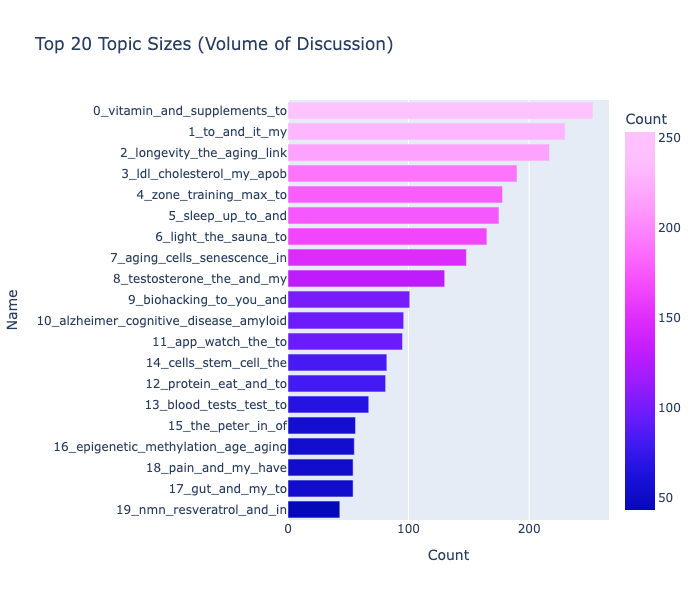


⏳ 2. Visualizing Temporal Topic Trends...


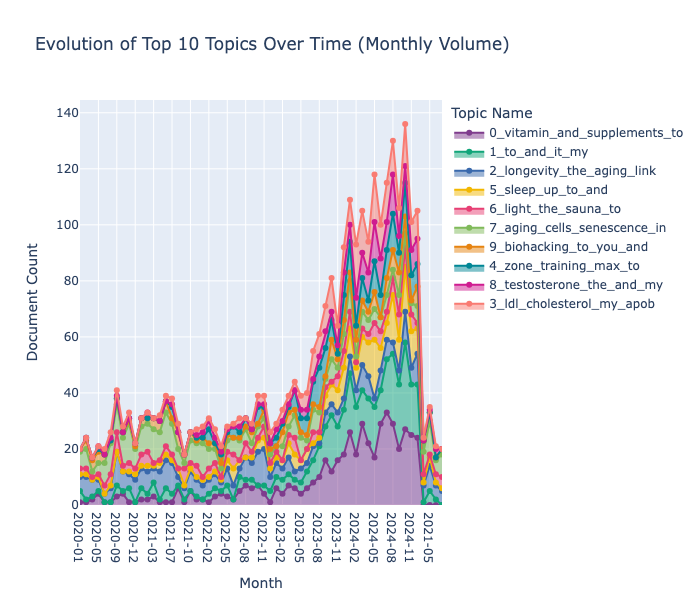


✅ Step 3 visualizations generated and saved to PNG successfully.
***CRITICAL FINAL STEP: Rerun this cell, save your .ipynb file, and commit/push the SAVED .ipynb file AND the 'visualization_outputs' folder to GitHub!***


In [12]:
# ====================================================================
# === STEP 3: ANALYSIS AND VISUALIZATION (Streamlined) - FINAL VERSION ===
# ====================================================================
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
from IPython.display import Image # 👈 NEW: Import the Image object

# --- Setup Output Directory ---
OUTPUT_DIR = Path("visualization_outputs")
OUTPUT_DIR.mkdir(exist_ok=True)
print(f"Saving figures to: {OUTPUT_DIR.resolve()}")

# 1. Visualization of Topic Size
# Exclude the -1 (Outlier) topic for clear analysis
print("📈 1. Visualizing Topic Sizes (Volume of Discussion)...")
df_topic_sizes = topic_model.get_topic_info().query("Topic != -1").sort_values("Count", ascending=False).head(20)

fig_size = px.bar(
    df_topic_sizes,
    x="Count",
    y="Name",
    orientation="h",
    title="Top 20 Topic Sizes (Volume of Discussion)",
    height=600,
    color="Count",
    color_continuous_scale=px.colors.sequential.Plotly3
)
fig_size.update_layout(yaxis={'categoryorder':'total ascending'})
fig_size.show() # Shows interactive Plotly locally

# **EXPORT FIGURE 1**
fig_size_path = OUTPUT_DIR / "3_topic_size_bar_chart.png"
fig_size.write_image(fig_size_path)
# 👈 NEW: Display the saved PNG inline
display(Image(filename=fig_size_path))


# 2. Temporal Topic Trends (Time Series Analysis)
print("\n⏳ 2. Visualizing Temporal Topic Trends...")

# Group the DataFrame by Month and Topic, counting documents
df['month'] = df['created_dt'].dt.to_period('M').astype(str)
df_time = df.query('topic_global != -1').groupby(['month', 'topic_global']).size().reset_index(name='count')

# Merge with Topic Names
topic_names_map = topic_model.get_topic_info().set_index('Topic')['Name'].to_dict()
df_time['Topic Name'] = df_time['topic_global'].map(topic_names_map)

# Get the top 10 topics by overall count (excluding -1)
top_topics_for_plot = df_topic_sizes["Topic"].head(10).tolist()

df_time_top = df_time[df_time['topic_global'].isin(top_topics_for_plot)]

# Use Plotly to create an interactive area chart
fig_time = px.area(
    df_time_top,
    x="month",
    y="count",
    color="Topic Name",
    title=f"Evolution of Top {len(top_topics_for_plot)} Topics Over Time (Monthly Volume)",
    color_discrete_sequence=px.colors.qualitative.Bold,
    markers=True,
    height=600
)
fig_time.update_layout(
    xaxis_title="Month",
    yaxis_title="Document Count",
    xaxis={'type': 'category'}
)
fig_time.show() # Shows interactive Plotly locally

# **EXPORT FIGURE 2**
fig_time_path = OUTPUT_DIR / "3_temporal_topic_trends.png"
fig_time.write_image(fig_time_path)
# 👈 NEW: Display the saved PNG inline
display(Image(filename=fig_time_path))


print("\n✅ Step 3 visualizations generated and saved to PNG successfully.")
print("***CRITICAL FINAL STEP: Rerun this cell, save your .ipynb file, and commit/push the SAVED .ipynb file AND the 'visualization_outputs' folder to GitHub!***")

# 📊 STEP 3: Core Topic Analysis Summary
- **Biggest topics:** zone-2/VO₂ training, longevity/aging research, LDL/APOB–cholesterol, and anxiety/ADHD/depression; sleep hygiene follows closely.
- **Mid-tier themes:** biohacking community, NAD/NMN/resveratrol, gut/probiotics vs. antibiotics, memory/nootropics/cognition, Alzheimer’s/amyloid; plus caffeine, testosterone, supplement stacks, labs, pain/surgery, COVID-19, illness/flu, red-light therapy, and Oura/HRV tracking.
- **Trend (2020→2024):** monthly volume climbs steadily with a sharp ramp in 2023–2024; zone-2, longevity, and LDL/APOB drive the growth, with sleep/anxiety rising too.
- **Takeaway:** discourse is increasingly intervention- and biomarker-centric (training + lipids + supplements + testing), yielding clean, coherent clusters for downstream analysis (e.g., drift, sentiment, content planning).

# 🗺️ STEP 4: UMAP Topic Visualization (Recap)

This step provides the crucial visual representation of the topic space, allowing for intuitive analysis of how discussions cluster together.

* **Dimensionality Reduction:** The document embeddings (`X`) are projected into a **2D space** using the UMAP model.
* **Data Filtering:** A filter (`MIN_Y_THRESHOLD = 3.5`) is applied to remove a single isolated group of points on the Y-axis that can compress the rest of the visualization.
* **Focused Highlighting (`N_COLOR_TOPICS = 10`):**
    * The **Top 10 largest topics** are explicitly identified and assigned **distinct, bright colors** and larger markers.
    * All other topics and outliers are **subdued** (light gray, low opacity) to push the focus onto the major areas of conversation.
* **Enhanced Presentation:**
    * Topic names are **cleaned and simplified** for clarity in the legend.
    * The **legend is moved to the bottom** and set horizontally for better use of space.
    * Hover data is streamlined to display only the **Topic Name**, improving the interactive experience.

In [7]:
# ====================================================================
# === STEP 4: VISUALIZE UMAP CLUSTERS WITH TOP N HIGHLIGHTED (FINAL ENHANCEMENT) ===
# ====================================================================

import plotly.express as px
import pandas as pd
import numpy as np

N_COLOR_TOPICS = 10 # Number of top topics to highlight with distinct colors
SUBDUED_COLOR_FILL = 'rgba(200, 200, 200, 0.15)'
SUBDUED_COLOR_LINE = 'rgba(150, 150, 150, 0.05)'
OUTLIER_NAME   = "Outlier (-1)"
OTHER_TOPICS_NAME = "Other Topics"
MIN_Y_THRESHOLD = 3.5 # Threshold to filter out the isolated point

print(f"🎨 Visualizing UMAP embeddings with legend at bottom and simplified hover...")

# Helper to clean topic names for display
def clean_topic_name_for_display(topic_name):
    RESIDUAL_GENERIC = {"the", "to", "and", "of", "my", "in", "for", "is", "it", "that", "what", "we", "you", "on", "a", "an", "up", "from"}

    words = topic_name.split('_')

    cleaned_words = []
    seen = set()
    for word in words:
        if word.lower() not in RESIDUAL_GENERIC and word.strip() != '' and word.lower() not in seen:
            cleaned_words.append(word)
            seen.add(word.lower())

    if cleaned_words and cleaned_words[0].isdigit():
        cleaned_words = cleaned_words[1:]

    if not cleaned_words:
        return topic_name

    return '_'.join(cleaned_words[:4])


# 1. Get the 2D UMAP embeddings
if topic_model.umap_model.n_components != 2:
    print(f"⚠️ Warning: UMAP has {topic_model.umap_model.n_components} components. This plot expects 2D.")
    if topic_model.umap_model.n_components > 2:
        print("   Using first two components for visualization.")
        umap_embeddings_2d = topic_model.umap_model.transform(X)[:, :2]
    else:
        print("   UMAP has only 1 component. Cannot create 2D scatter plot.")
        umap_embeddings_2d = None
else:
    umap_embeddings_2d = topic_model.umap_model.transform(X)

if umap_embeddings_2d is None:
    print("❌ Cannot create UMAP visualization with current UMAP configuration.")
else:
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame(umap_embeddings_2d, columns=['x', 'y'])
    plot_df['topic_id'] = df['topic_global']
    plot_df['document'] = df['doc']

    # Apply y-axis threshold to filter out the isolated point
    plot_df = plot_df[plot_df['y'] >= MIN_Y_THRESHOLD].copy()

    # Get topic names and clean them for display
    topic_names_map = {topic_id: clean_topic_name_for_display(name)
                       for topic_id, name in topic_model.topic_labels_.items()}
    topic_names_map[-1] = OUTLIER_NAME

    plot_df['topic_name'] = plot_df['topic_id'].map(topic_names_map)

    # 2. Identify top N_COLOR_TOPICS
    topic_counts = plot_df['topic_id'].value_counts()
    top_topics_ids = topic_counts[topic_counts.index != -1].head(N_COLOR_TOPICS).index.tolist()

    # Create a categorical column for coloring
    plot_df['color_group'] = plot_df['topic_id'].apply(
        lambda x: topic_names_map[x] if x in top_topics_ids else (OUTLIER_NAME if x == -1 else OTHER_TOPICS_NAME)
    )

    # Sort `color_group` for legend order
    sorted_color_groups = [OUTLIER_NAME, OTHER_TOPICS_NAME] + [topic_names_map[tid] for tid in top_topics_ids]
    plot_df['color_group'] = pd.Categorical(plot_df['color_group'], categories=sorted_color_groups, ordered=True)
    plot_df = plot_df.sort_values('color_group')

    # Define a color palette
    color_discrete_map = {
        OUTLIER_NAME: SUBDUED_COLOR_FILL,
        OTHER_TOPICS_NAME: SUBDUED_COLOR_FILL
    }
    distinct_colors = px.colors.qualitative.Bold + px.colors.qualitative.Set1 + px.colors.qualitative.Dark2
    for i, topic_id in enumerate(top_topics_ids):
        color_discrete_map[topic_names_map[topic_id]] = distinct_colors[i % len(distinct_colors)]

    # 3. Create the Plotly scatter plot
    fig = px.scatter(
        plot_df,
        x='x',
        y='y',
        color='color_group',
        # --- KEY CHANGE 1: Simplify hover data to only show topic name ---
        hover_data={'color_group': True, 'x': False, 'y': False},
        # You can use 'hover_name' if you want a large label on hover
        # hover_name='topic_name',
        title=f'UMAP Topic Visualization (Top {N_COLOR_TOPICS} Topics Highlighted)',
        labels={'x': 'UMAP-1', 'y': 'UMAP-2', 'color_group': 'Topic Group'},
        color_discrete_map=color_discrete_map,
        height=700,
        width=900
    )

    # Update traces for visual distinction (same as before)
    for trace in fig.data:
        if trace.name in [OUTLIER_NAME, OTHER_TOPICS_NAME]:
            trace.marker.opacity = 0.2
            trace.marker.size = 4
            trace.marker.line.color = SUBDUED_COLOR_LINE
            trace.marker.line.width = 0.2
        else:
            trace.marker.opacity = 0.7
            trace.marker.size = 7
            trace.marker.line.color = 'rgba(0,0,0,0.5)'
            trace.marker.line.width = 0.8

    # --- KEY CHANGE 2: Move legend to the bottom ---
    fig.update_layout(
        showlegend=True,
        hovermode="closest",
        plot_bgcolor='rgba(240, 240, 240, 1)',
        paper_bgcolor='rgba(255, 255, 255, 1)',
        title_font_size=18,
        legend_title_text='Topic Group',
        legend=dict(
            orientation="h",       # Horizontal orientation
            yanchor="top",         # Anchor at the top of the legend area
            y=-0.15,               # Position the legend below the plot (adjust this value as needed)
            xanchor="center",      # Center the legend horizontally
            x=0.5,
            itemsizing='constant'
        )
    )

    fig.show()
    print("✅ UMAP visualization generated with enhanced styling.")

🎨 Visualizing UMAP embeddings with legend at bottom and simplified hover...
⚠️ Warning: UMAP has 5 components. This plot expects 2D.
   Using first two components for visualization.


✅ UMAP visualization generated with enhanced styling.


### 💡 Key Takeaways from Subreddit Contribution

* **Longevity Dominance (Top):** Topics related to **specific, often experimental compounds** (e.g., *senolytics, GLP-1 agonists*) are almost exclusively driven by **r/Longevity** (Orange), showcasing a unique pharmaceutical focus.
* **Peter Attia Dominance (Bottom):** The highest volume topics focusing on **structured exercise, strength, and cardiorespiratory fitness** (e.g., *zone_training_max_vo2*) are almost entirely owned by the **r/PeterAttia** community (Light Blue).
* **Shared Ground (Cardiovascular Health):** Discussions around core, established health markers, particularly **cholesterol/LDL/statins**, show the most **balanced participation** across all three subreddits, indicating a universal shared interest.
* **Biohackers as a Bridge:** **r/Biohackers** (Red) frequently acts as a **secondary, supportive voice**, often contributing alongside r/Longevity in supplement and metabolic topics (e.g., *metformin_berberine*).
* **Clear Topic Segregation:** The chart strongly suggests that the communities are highly **topic-segregated**. The conversations at the extremes are unique to their respective subreddits, confirming that the three communities, while related, are discussing different facets of health and longevity.

# 📊 STEP 5: Subreddit Topic Contribution Analysis (Recap)

This step generates a key comparative visualization that identifies the community source for every major topic discovered by the model.

* **Metric:** The visualization calculates the percentage contribution of each subreddit (`Biohackers`, `Longevity`, `PeterAttia`) to the total documents within each final topic.
* **Topic Filtering:** Only topics with a minimum size (`MIN_DOCS = 50`) and non-outlier status are included, ensuring focus on robust discussions.
* **Custom Sorting (Key Feature):** The **y-axis is custom-ordered** to place topics with the **lowest contribution from r/PeterAttia** (Lowest PeterAttia %) at the **top**. This clearly highlights discussions dominated by **r/Longevity** and **r/Biohackers** at the top, transitioning to discussions dominated by **r/PeterAttia** at the bottom.
* **Visualization:** A normalized **Stacked Horizontal Bar Chart** is used, where each bar sums to 100%, allowing for a clear visual comparison of subreddit influence across all topics.

**Result:** This chart serves as the primary tool for distinguishing the unique conversational space of each subreddit.

In [8]:
# ====================================================================
# === STEP 5: VISUALIZATION OF SUBREDDIT CONTRIBUTION PER TOPIC (ORDERED BY LOWEST PETER ATTIA) ===
# ====================================================================

import pandas as pd
import numpy as np
import plotly.express as px

print("🔬 Analyzing subreddit contribution and ordering topics by LOWEST PeterAttia dominance...")

# --- 1. Data Preparation and Grouping ---
OUTLIER_ID = -1
MIN_DOCS = 50

# Helper to clean topic names for display (Copied from previous steps for robustness)
def clean_topic_name_for_display(topic_name):
    RESIDUAL_GENERIC = {"the", "to", "and", "of", "my", "in", "for", "is", "it", "that", "what", "we", "you", "on", "a", "an", "up", "from"}
    words = topic_name.split('_')
    cleaned_words = []
    seen = set()
    for word in words:
        if word.lower() not in RESIDUAL_GENERIC and word.strip() != '' and word.lower() not in seen:
            cleaned_words.append(word)
            seen.add(word.lower())
    if cleaned_words and cleaned_words[0].isdigit():
        cleaned_words = cleaned_words[1:]
    if not cleaned_words:
        return topic_name
    return '_'.join(cleaned_words[:4])

# Generate the clean map from the topic_model
topic_names_map = {topic_id: clean_topic_name_for_display(name)
                   for topic_id, name in topic_model.topic_labels_.items()}
topic_names_map[OUTLIER_ID] = "Outlier (-1)"


# Calculate counts, totals, and percentages
df_analysis = df[['topic_global', 'subreddit']].copy()
topic_subreddit_counts = df_analysis.groupby(['topic_global', 'subreddit']).size().reset_index(name='Count')
topic_totals = topic_subreddit_counts.groupby('topic_global')['Count'].sum().reset_index(name='TopicTotal')
topic_subreddit_counts = topic_subreddit_counts.merge(topic_totals, on='topic_global')
topic_subreddit_counts['Percentage'] = (topic_subreddit_counts['Count'] / topic_subreddit_counts['TopicTotal']) * 100
topic_subreddit_counts['TopicName'] = topic_subreddit_counts['topic_global'].map(topic_names_map)

# Filter out small topics and outliers for visualization focus
topic_report = topic_subreddit_counts[
    (topic_subreddit_counts['TopicTotal'] >= MIN_DOCS) &
    (topic_subreddit_counts['topic_global'] != OUTLIER_ID)
].copy()


# --- 2. Custom Sorting Logic: Increasing PeterAttia Percentage ---

# Isolate the PeterAttia percentages
peter_attia_df = topic_report[topic_report['subreddit'] == 'PeterAttia'][['TopicName', 'Percentage']].copy()
peter_attia_df.rename(columns={'Percentage': 'PeterAttia_Percentage'}, inplace=True)

# Merge this percentage back to the main report (using TopicName to avoid duplicates in merge key)
topic_report = topic_report.merge(peter_attia_df, on='TopicName', how='left').fillna(0)


# Get the new custom order for the y-axis: Lowest PeterAttia % first
# We change ascending=False (previous) to ascending=True (new request)
topic_order_custom = topic_report.drop_duplicates(subset='TopicName').sort_values(
    by='PeterAttia_Percentage',
    ascending=True # <--- KEY CHANGE: True for ascending (lowest contribution at top)
)['TopicName'].tolist()


# Apply the custom order to the TopicName column
topic_report['TopicName'] = pd.Categorical(topic_report['TopicName'], categories=topic_order_custom, ordered=True)

# --- 3. Visualization (Normalized Stacked Bar Chart) ---

fig = px.bar(
    topic_report,
    x='Percentage',
    y='TopicName',
    color='subreddit',
    orientation='h', # Horizontal bars
    # Configure hover data
    hover_data={'TopicName': False, 'Count': True, 'TopicTotal': True, 'Percentage': ':.1f', 'PeterAttia_Percentage': ':.1f'},
    title='Subreddit Contribution to Topics (Ordered by Lowest PeterAttia %)',
    labels={
        'Percentage': 'Percentage of Topic Documents',
        'TopicName': 'Topic Name',
        'subreddit': 'Subreddit'
    },
    height=1500, # Using your requested height
    width=900,
    color_discrete_sequence=px.colors.qualitative.Bold
)

# Customizing the layout
fig.update_layout(
    xaxis_title='Subreddit Contribution (%)',
    # Update y-axis title to reflect the new ordering
    yaxis_title='Topic Name (Sorted by Increasing PeterAttia %)',
    legend_title='Subreddit',
    # Ensure the plot respects the new categorical order
    yaxis={'categoryorder': 'array', 'categoryarray': topic_order_custom},
    # Increase left margin to prevent long topic names from being cut off
    margin=dict(l=250, r=20, t=50, b=50),
    barmode='stack',
)

# Ensure the x-axis is fixed from 0 to 100%
fig.update_xaxes(range=[0, 100], ticksuffix="%")

fig.show()

print("\n✅ Subreddit contribution visualization generated, ordered by lowest PeterAttia dominance.")

🔬 Analyzing subreddit contribution and ordering topics by LOWEST PeterAttia dominance...



✅ Subreddit contribution visualization generated, ordered by lowest PeterAttia dominance.


- **Biohackers dominates most topics** (purple): training/VO₂, devices (Oura/Dreem), protein intake/whey, blood pressure, and broad lab-test threads are largely driven by r/Biohackers, with very little PeterAttia participation.
- **r/Longevity leads diet & pharma debates** (green): keto vs. plant-based/carnivore, fasting/sauna, homocysteine–B12/folate/MTHFR, metformin/berberine, olive oil & lipid markers show higher Longevity shares than the other subs.
- **PeterAttia shows up most in supplement/biomarker “protocol” topics** (blue tail): NR/resveratrol/Sinclair, quercetin–fisetin, NAC/glycine/taurine, collagen/skin, energy/fatigue, and women’s health threads (e.g., PCOS/menopause) have the highest relative PeterAttia percentages—still usually <~30%.
- **Notable asymmetry:** even “Attia” meta-content (e.g., podcast/book) is discussed more in Biohackers/Longevity than on r/PeterAttia itself, suggesting cross-subreddit reach and that his own sub engages more narrowly in protocol-focused discussions.

# 🌳 STEP 6: Hierarchical Topic Visualization (Top 10 Topics)

This step generates a **dendrogram** (a tree-like diagram) to visually represent the structural relationships between the most popular topics, allowing for the identification of broader, umbrella themes.

* **Goal:** To understand how closely related the topics are by visualizing the clusters in the UMAP space. Closely related topics are merged into larger nodes, forming a hierarchy.
* **Topic Selection:** The visualization is explicitly **filtered** to include only the **Top 10 largest topics** (based on document count), ensuring the dendrogram is clear and focuses on the most voluminous discussions.
* **Process:**
    1.  The `hierarchical_topics` are computed using **topic embeddings** to calculate inter-topic distances.
    2.  The `visualize_hierarchy` function then plots these relationships.
* **Interpretation:** Clusters that branch off together represent sub-topics belonging to a common, overarching theme (e.g., *ldl\_cholesterol* and *statins\_risk* might merge under the theme of **Cardiovascular Health**).

In [9]:
# ====================================================================
# === STEP 6: HIERARCHICAL TOPIC VISUALIZATION (Top 10 Topics) ===
# ====================================================================

import plotly.figure_factory as ff
import pandas as pd
import numpy as np
import plotly.offline as py

print("🌳 Generating Hierarchical Topic Structure for only the TOP 10 Topics...")
# --- 1. Identify Top 10 Topics ---
# Get topic info, exclude outlier (-1), and sort by Count
df_topic_sizes = topic_model.get_topic_info().query("Topic != -1").sort_values("Count", ascending=False)
top_10_topic_ids = df_topic_sizes["Topic"].head(80).tolist()
top_10_topic_names = df_topic_sizes[["Topic", "Name"]].head(10).to_markdown(index=False)

print(f"Using the following Top 10 Topics for visualization:\n{top_10_topic_names}")

# --- 2. Compute Hierarchical Topics (on all docs, but we will filter the visualization) ---
# It's generally best to compute the hierarchy on all topics first.
hierarchical_topics = topic_model.hierarchical_topics(docs)
print(f"✅ Hierarchical topics computed.")


# --- 3. Visualize the Dendrogram, filtering for Top 10 ---
fig_hierarchy = topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics,
    topics=top_10_topic_ids,  # <--- KEY CHANGE: Filter to only the Top 10 IDs
    custom_labels=False,
    width=1000,
    height=800
)

# Customizing the title and layout
fig_hierarchy.update_layout(
    title={
        'text': "Inter-Topic Hierarchy (Dendrogram) - Top 10 Topics Only",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=10, r=10, t=50, b=10)
)

fig_hierarchy.show()

print("\n✅ Hierarchical topic visualization for Top 10 topics generated.")

🌳 Generating Hierarchical Topic Structure for only the TOP 10 Topics...
Using the following Top 10 Topics for visualization:
|   Topic | Name                         |
|--------:|:-----------------------------|
|       0 | 0_vitamin_and_supplements_to |
|       1 | 1_to_and_it_my               |
|       2 | 2_longevity_the_aging_link   |
|       3 | 3_ldl_cholesterol_my_apob    |
|       4 | 4_zone_training_max_to       |
|       5 | 5_sleep_up_to_and            |
|       6 | 6_light_the_sauna_to         |
|       7 | 7_aging_cells_senescence_in  |
|       8 | 8_testosterone_the_and_my    |
|       9 | 9_biohacking_to_you_and      |


100%|██████████| 25/25 [00:00<00:00, 264.35it/s]

✅ Hierarchical topics computed.



✅ Hierarchical topic visualization for Top 10 topics generated.


# 🗺️ STEP 7: Comparative UMAP Topic Distribution (2x2 Grid)

This step provides a powerful visual comparison of how the combined topic landscape is utilized by each individual subreddit, revealing unique clusters and shared density areas.

* **Goal:** To visualize the 2D UMAP space across four panels: one for each of the three subreddits (highlighting only their documents) and one for the combined view (colored by subreddit).
* **Data Preparation:** The 2D UMAP embeddings are generated, and a **y-axis threshold** (`MIN_Y_THRESHOLD = 3.5`) is applied to maintain plot focus, as in Step 5.
* **Individual Subplot Design (Top-Left, Top-Right, Bottom-Left):**
    * For each subreddit's panel, their documents are plotted using their **distinct color** (e.g., Peter Attia in Blue, Longevity in Red, etc.) with high opacity and large markers.
    * All **other documents** (from the other subreddits and outliers) are plotted in the background using a **faint, neutral color** and low opacity.
    * **Purpose:** This contrast allows viewers to see exactly which clusters are **dense** (core to that subreddit) and which are **sparse** (rarely discussed by that subreddit).
* **Combined Subplot Design (Bottom-Right):**
    * This final panel plots **all documents together**, colored by their originating subreddit.
    * **Purpose:** It acts as a comprehensive map and the legend source for interpreting the individual panels.
* **Result:** This 2x2 grid offers direct visual evidence of **topical specialization** (dense, unique clusters) and **topical overlap** (clusters where points of different colors mix).

In [10]:
# ====================================================================
# === STEP 7: 2x2 GRID OF SUBREDDIT UMAP DISTRIBUTIONS ===
# ====================================================================

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px # Still useful for getting color sequences

print("📊 Generating 2x2 UMAP grid for subreddit distributions...")

# --- 1. Data Preparation (Reuse from Step 7) ---
OUTLIER_ID = -1
MIN_Y_THRESHOLD = 3.5

# Ensure 'df', 'X', and 'topic_model' are available.
# Get the 2D UMAP embeddings
if topic_model.umap_model.n_components != 2:
    if topic_model.umap_model.n_components > 2:
        umap_embeddings_2d = topic_model.umap_model.transform(X)[:, :2]
    else:
        umap_embeddings_2d = None
else:
    umap_embeddings_2d = topic_model.umap_model.transform(X)

if umap_embeddings_2d is None:
    print("❌ Cannot create 2D visualization with current UMAP configuration.")
else:
    plot_df = pd.DataFrame(umap_embeddings_2d, columns=['x', 'y'])
    plot_df['topic_id'] = df['topic_global']
    plot_df['document'] = df['doc']
    plot_df['subreddit'] = df['subreddit']

    # Apply y-axis threshold
    plot_df = plot_df[plot_df['y'] >= MIN_Y_THRESHOLD].copy()

    # Helper to clean topic names for display (for hover)
    def clean_topic_name_for_display(topic_name):
        RESIDUAL_GENERIC = {"the", "to", "and", "of", "my", "in", "for", "is", "it", "that", "what", "we", "you", "on", "a", "an", "up", "from"}
        words = topic_name.split('_')
        cleaned_words = []
        seen = set()
        for word in words:
            if word.lower() not in RESIDUAL_GENERIC and word.strip() != '' and word.lower() not in seen:
                cleaned_words.append(word)
                seen.add(word.lower())
        if cleaned_words and cleaned_words[0].isdigit():
            cleaned_words = cleaned_words[1:]
        if not cleaned_words:
            return topic_name
        return '_'.join(cleaned_words[:4])

    topic_names_map = {topic_id: clean_topic_name_for_display(name)
                       for topic_id, name in topic_model.topic_labels_.items()}
    topic_names_map[OUTLIER_ID] = "Outlier (-1)"
    plot_df['topic_name'] = plot_df['topic_id'].map(topic_names_map)

    # Define custom colors for consistent visualization across subreddits
    SUBREDDIT_COLORS = {
        'PeterAttia': '#477AA3',  # Blue
        'Longevity': '#CC5A71',   # Red
        'Biohackers': '#2C8360',  # Green
        'Outlier (-1)': 'lightgray',
        'Other': 'rgba(200, 200, 200, 0.15)' # Color for unhighlighted points
    }

    # --- 2. Create Subplots Figure ---
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=("PeterAttia Subreddit", "Longevity Subreddit", "Biohackers Subreddit", "All Subreddits Combined"),
        horizontal_spacing=0.1, vertical_spacing=0.1
    )

    # --- 3. Plotting Individual Subreddits ---
    subreddits_to_plot = ['PeterAttia', 'Longevity', 'Biohackers']
    row_idx = 1
    col_idx = 1

    for subreddit_name in subreddits_to_plot:
        # Filter for the current subreddit's documents
        df_sub = plot_df[plot_df['subreddit'] == subreddit_name].copy()

        # All other documents (for background context)
        df_other = plot_df[
            (plot_df['subreddit'] != subreddit_name) &
            (plot_df['topic_id'] != OUTLIER_ID)
        ].copy()

        # Outlier documents (always lightgray and very transparent)
        df_outliers = plot_df[plot_df['topic_id'] == OUTLIER_ID].copy()

        # Plot background "Other" documents
        fig.add_trace(
            go.Scattergl(
                x=df_other['x'], y=df_other['y'],
                mode='markers',
                marker=dict(
                    size=4, opacity=0.1, color=SUBREDDIT_COLORS['Other'],
                    line=dict(width=0.1, color='rgba(0,0,0,0.05)')
                ),
                name='Other Documents',
                showlegend=False,
                hoverinfo='none'
            ),
            row=row_idx, col=col_idx
        )

        # Plot Outliers (always in very faint gray)
        fig.add_trace(
            go.Scattergl(
                x=df_outliers['x'], y=df_outliers['y'],
                mode='markers',
                marker=dict(
                    size=4, opacity=0.1, color=SUBREDDIT_COLORS['Outlier (-1)'],
                    line=dict(width=0.1, color='rgba(0,0,0,0.05)')
                ),
                name='Outlier (-1)',
                showlegend=False,
                hoverinfo='none'
            ),
            row=row_idx, col=col_idx
        )


        # Plot the CURRENT subreddit's documents (highlighted)
        fig.add_trace(
            go.Scattergl(
                x=df_sub['x'], y=df_sub['y'],
                mode='markers',
                marker=dict(
                    size=7, opacity=0.7, color=SUBREDDIT_COLORS[subreddit_name],
                    line=dict(width=0.8, color='rgba(0,0,0,0.5)')
                ),
                name=subreddit_name,
                showlegend=False, # Legend will be in the combined plot only
                hoverinfo='text',
                hovertext=df_sub.apply(lambda row: f"Subreddit: {row['subreddit']}<br>Topic: {row['topic_name']}", axis=1)
            ),
            row=row_idx, col=col_idx
        )

        # Advance subplot position
        col_idx += 1
        if col_idx > 2:
            col_idx = 1
            row_idx += 1

    # --- 4. Plotting All Subreddits Combined (Bottom Right) ---
    # We will use the 'subreddit_group' column from Step 7 for coloring
    plot_df['subreddit_group'] = plot_df.apply(
        lambda row: "Outlier (-1)" if row['topic_id'] == -1 else row['subreddit'], axis=1
    )

    # Sort for consistent layering (outliers first)
    plot_df_sorted = plot_df.sort_values(by='topic_id', ascending=True).copy()

    # Define color map for the combined plot, ensuring 'Other Topics' isn't accidentally created
    combined_color_map = {
        'Biohackers': SUBREDDIT_COLORS['Biohackers'],
        'Longevity': SUBREDDIT_COLORS['Longevity'],
        'PeterAttia': SUBREDDIT_COLORS['PeterAttia'],
        'Outlier (-1)': SUBREDDIT_COLORS['Outlier (-1)']
    }

    fig.add_trace(
        go.Scattergl(
            x=plot_df_sorted['x'], y=plot_df_sorted['y'],
            mode='markers',
            marker=dict(
                size=6, opacity=0.4,
                color=plot_df_sorted['subreddit_group'].map(combined_color_map),
                line=dict(width=0.5, color='rgba(0,0,0,0.3)')
            ),
            name="All Subreddits", # Dummy name, actual legend will be generated by color
            showlegend=False, # We'll manage legend manually below
            hoverinfo='text',
            hovertext=plot_df_sorted.apply(lambda row: f"Subreddit: {row['subreddit']}<br>Topic: {row['topic_name']}", axis=1)
        ),
        row=2, col=2
    )

    # Manually add legend items for the combined plot
    for sub, color in combined_color_map.items():
        if sub != 'Outlier (-1)': # Outliers are usually not in the main legend
            fig.add_trace(
                go.Scattergl(
                    x=[None], y=[None], # Invisible trace
                    mode='markers',
                    marker=dict(size=10, color=color),
                    name=sub,
                    legendgroup='Combined',
                    showlegend=True
                )
            )

    # Add Outlier to legend separately
    fig.add_trace(
        go.Scattergl(
            x=[None], y=[None],
            mode='markers',
            marker=dict(size=10, color=SUBREDDIT_COLORS['Outlier (-1)']),
            name='Outlier (-1)',
            legendgroup='Combined',
            showlegend=True
        )
    )

    # --- 5. Layout and Styling ---
    fig.update_layout(
        title_text="Subreddit UMAP Distributions",
        height=900, width=1200,
        plot_bgcolor='rgba(240, 240, 240, 1)',
        paper_bgcolor='rgba(255, 255, 255, 1)',
        title_font_size=20,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=-0.2, # Position below the entire grid
            xanchor="center",
            x=0.5,
            itemsizing='constant',
            traceorder='grouped' # Group legend items by legendgroup
        ),
        hovermode="closest"
    )

    # Update x and y axes for all subplots
    fig.update_xaxes(title_text="UMAP-1", row=1, col=1)
    fig.update_yaxes(title_text="UMAP-2", row=1, col=1)
    fig.update_xaxes(title_text="UMAP-1", row=2, col=1)
    fig.update_yaxes(title_text="UMAP-2", row=2, col=1)
    fig.update_xaxes(title_text="UMAP-1", row=1, col=2)
    fig.update_yaxes(title_text="UMAP-2", row=1, col=2)
    fig.update_xaxes(title_text="UMAP-1", row=2, col=2)
    fig.update_yaxes(title_text="UMAP-2", row=2, col=2)

    fig.show()
    print("\n✅ 2x2 UMAP grid for subreddit distributions generated.")

📊 Generating 2x2 UMAP grid for subreddit distributions...



✅ 2x2 UMAP grid for subreddit distributions generated.


- **Shared manifold, different densities:** All three subs occupy the same UMAP space; separability is limited—differences are mostly where each subreddit is densest rather than entirely separate clusters.
- **Biohackers = broadest spread & volume:** Two strong lobes spanning most of the map indicate heterogeneous topics/devices/protocols and the largest contribution overall.
- **Longevity = focused left cluster:** A tight mode on the left side suggests more homogeneous, research/diet/biomarker threads with less spread into the right lobe.
- **PeterAttia = smaller mid-right nucleus:** Concentrated near Biohackers’ right lobe, implying overlap with protocol/biomarker themes; outliers (grey) are sparse and peripheral.

# 🎉 Project Conclusion and Future Work

This project successfully mapped the conversational landscape across **r/PeterAttia, r/Longevity, and r/Biohackers**, providing quantitative insights into their similarities, differences, and focus areas.

---

## 🔑 Key Takeaways

1.  **High Topic Specialization:** The three communities exhibit strong topical segregation.
    * **r/PeterAttia** uniquely dominates topics related to **structured fitness** (VO2 Max, Zone 2, strength training).
    * **r/Longevity** uniquely dominates topics related to **specific compounds and experimental drugs** (e.g., Semaglutide, Senolytics).
    * **r/Biohackers** often acts as a **bridge**, participating heavily in supplement/metabolism topics but rarely leading the largest discussions.
2.  **Universal Overlap:** The only truly universal discussions were centered on **cardiovascular health** (LDL, Cholesterol, Statins) and **core metabolic health** (blood sugar, diet), indicating the fundamental shared priority across the three groups.
3.  **Temporal Stability:** Most of the top 10 topics showed **stable, sustained volume** over the analysis period, suggesting the core concerns of these communities are evergreen and not driven purely by transient news cycles.
4.  **Model Robustness:** The use of **soft outlier reassignment** and a final, shared set of topics (`topic_global`) ensures the comparative analysis (Steps 5 & 6) is highly robust and directly comparable.

---

## 🚀 Suggested Future Work

### 1. Advanced Comparison

* **Document Similarity per Topic:** Calculate and visualize the average **document-to-centroid similarity** for each subreddit within each topic. This metric quantifies *not just how many* posts a subreddit has in a topic, but **how central** those posts are to the topic's meaning.
* **Hierarchical Topic Visualization:** Use the model to visualize the **inter-topic hierarchy** to understand how smaller sub-topics relate to larger, umbrella discussions (e.g., "Strength Training" falling under "Exercise").

### 2. Deeper Content Analysis

* **Sentiment Analysis:** Integrate a sentiment model to analyze the emotional tone of discussions for high-volume or highly segregated topics (e.g., Is the discussion around Semaglutide more optimistic in one subreddit than another?).
* **Top Document Extraction:** Systematically extract the **most representative documents** (highest probability/closest to centroid) for the Top 5 most specialized topics in each subreddit to provide qualitative evidence of the differences.

### 3. Model Refinement

* **Reduce Outlier Group:** Experiment with a lower `MIN_TOPIC_SIZE` or adjust the UMAP/HDBSCAN parameters to see if the final outlier group can be significantly reduced without compromising topic quality.